In [ ]:
import pandas as pd 

bio_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_11_bio.csv", index_col=0)
clip_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_clip_FG_CLIP_15.csv", index_col=0)
visual_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_visual_branch_only.csv", index_col=0)
clip_vis = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_18_clip_vis.csv", index_col=0)
bio_res.rename(columns={'acc': 'BiomedCLIP'}, inplace=True)
clip_res.rename(columns={'acc': 'CLIP'}, inplace=True)
visual_res.rename(columns={'acc': 'BiomedCLIP(w/o line branch)'}, inplace=True)
clip_vis.rename(columns={'acc': 'CLIP(w/o line branch)'}, inplace=True)
# print(bio_res.head())
# print(clip_res.head())
# print(visual_res.head())
# print(clip_vis.head())
merged_df = pd.merge(bio_res, clip_res, on='global_step')
merged_df = pd.merge(merged_df, visual_res, on="global_step")
merged_df = pd.merge(merged_df, clip_vis, on="global_step")
merged_df.set_index('global_step', inplace=True)
print(merged_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# merged_df.plot(kind='line', marker='o')

# bio_max = merged_df.bio_accuracy.max()
# clip_max = merged_df.clip_accuracy.max()
# bio_std = merged_df.bio_accuracy.std()
# clip_std = merged_df.clip_accuracy.std()
# vis_std = merged_df.visonly_accuracy.std()
# clip_vis_std = merged_df.clip_visonly_accuracy.std()
# 设置图表标题和标签
plt.title('Accuracy over iterations')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
# # for i, txt in enumerate(merged_df['bio_accuracy']):
# #     plt.line(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
# # for i, txt in enumerate(merged_df['clip_accuracy']):
# #     plt.line(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
# plt.line(5000, 0.636, f'bio_std: {bio_std:.4f}', fontsize=13, ha='center', va='top', color='blue')
# plt.line(5000, 0.624, f'clip_std: {clip_std:.4f}', fontsize=13, ha='center', va='bottom', color='orange')
# plt.line(9060, 0.632, f'bio_vis_only_std: {vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='green')
# plt.line(9060, 0.624, f'clip_vis_only_std: {clip_vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='red')
# 显示图表

sns.lineplot(data=merged_df[:], markers=True, linestyle="-")
# plt.legend(bbox_to_anchor=(0.55, 0.18), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
from scipy import stats
import numpy as np
accuracy_values = merged_df["visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("visonly_accuracy 均值:", mean_accuracy)
print("visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("visonly_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["bio_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("bio_accuracy 均值:", mean_accuracy)
print("bio_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("bio_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_accuracy 均值:", mean_accuracy)
print("clip_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_visonly_accuracy 均值:", mean_accuracy)
print("clip_visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_visonly_accuracy 95% 置信区间:", confidence_interval)

plt.figure(figure=(10, 6 ))
sns.lineplot

In [ ]:
import matplotlib.pyplot as plt

# 示例数据
mean_values = [0.6633584288052374, 0.6537741407528641, 0.6567135842880523, 0.6422258592471358]
confidence_intervals = [(0.6565328964226492, 0.6701839611878256), (0.6435082773371567, 0.6640400041685716), (0.6520514115091033, 0.6613757570670012) , (0.6305310105230305, 0.6539207079712411)]

# 提取置信区间的半宽度
half_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.errorbar(x=range(1, len(mean_values) + 1), y=mean_values, yerr=half_widths, fmt='o', capsize=5)

# 添加标题和标签
plt.title('mean acc & 95% CI')
plt.xticks([1, 2, 3, 4], ['bio_vision_only', 'biomed', 'clip',  "clip_vision_only"])
plt.xlabel('different models')
plt.ylabel('mean acc')
plt.grid()

# 显示图表
plt.show()


## phased conclusion

针对训练阶段，发现了一个有意思的现象， 使用两个pre-train models : CLIP, BiomedCLIP

1. 在有限的训练次数下，biomed通过orthogonal module后，<font color=red>**起始性能不如不使用orthogonal module的version（biomed vision encoder only）**</font>， <font color=red>**但是随着训练次数的增加，biomedCLIP version 的性能逐渐提升（在vision only version 性能达到瓶颈或过拟合的时候）**</font>。同时加入orthogonal后一定程度的缓解了过拟合。 在上图中， Biomed version 的95%置信区间更大可以理解为，在整个训练过程中，该模型的性能提升更明显

2. 相反，在CLIP中，使用完整的CLIP（vision+line）encoder在起始阶段会有更好的performance，同时它的performance还更加稳定。
3. 这种现象是否能被理解为，**biomedCLIP相比于CLIP学到了更具有针对性的医学影像信息**。导致将向量正交化的操作改变原有学到的医学影像上的特定知识。而在多次迭代后，biomed FGCLIP在biomed的原有基础上学到了更适合于当前任务的embedding表征，因此在后续的训练中，acc逐渐升高
4. 相反的，**CLIP中保存的是更为general的knowledge**，因此起始阶段，直接将其正交化操作不会对医学领域的特定知识产生过大的负面影响。Oppositely，通过将相对较为general的医学知识进行正交，更有利于该pre-trained在当前任务上的performance





In [ ]:
from uu import decode

df_clip_100 = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\clip_version_100step.csv")
df_clip_100.head()

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
# 使用 seaborn 的线图
sns.lineplot(x='ITERATION', y='ACC', data=df_clip_100)
# plt.plot(df_clip_100['ITERATION'], df_clip_100['ACC'], marker='o')
std = df_clip_100.ACC.std()
mean = df_clip_100.ACC.mean()
max = df_clip_100.ACC.max()
min = df_clip_100.ACC.min()
# 设置图表标题和轴标签
plt.title('ACC vs iteration')
plt.xlabel('iteration')
plt.ylabel('ACC')

plt.line(9500, 0.69, f'std: {std:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.line(9500, 0.68, f'mean: {mean:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.line(9500, 0.67, f'max: {max:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.line(9500, 0.66, f'min: {min:.4f}', fontsize=13, ha='center', va='top', color='orange')
# 显示图表
plt.grid()
plt.show()


## AUC analysis

In [ ]:
import pickle
import seaborn as sns
import os
pwd = os.getcwd()
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')


plt.grid()# 在图上画一条横线
plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xyline=(custom_tick_position, -0.5),
            color='red', fontsize=8, ha='center',
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xticks(rotation=45, ha='right') 
line_position1 = (1, 0.52)
line_position2 = (1, 0.54)
line_position3 = (1, 0.56)
line_position4 = (1, 0.58)
ax.line(line_position1[0], line_position1[1], f'mean in CLIP: {clip["average"]}', color='red', fontsize=9)
ax.line(line_position2[0], line_position2[1], f'mean in biomedCLIP: {biomedCLIP["average"]}', color='red', fontsize=9)
ax.line(line_position3[0], line_position3[1], f'mean in biomedclipvisiononly: {biomedclipvisiononly["average"]}"', color='red', fontsize=9)
ax.line(line_position4[0], line_position4[1], f'mean in CLIP_vision: {clipv["average"]}', color='red', fontsize=9)

plt.show()

print(f"std of clip-V : {np.std(list(clipv.values())[:-1])}")
print(f"std of clip : {np.std(list(clip.values())[:-1])}")
print(f"std of bioclip-V : {np.std(list(biomedclipvisiononly.values())[:-1])}")
print(f"std of bioclip : {np.std(list(biomedCLIP.values())[:-1])}")


In [ ]:
import pickle
from numpy import size
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')



plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
# ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xyline=(custom_tick_position, -0.5),
#             color='red', fontsize=11, ha='center',
#             arrowprops=dict(facecolor='red', shrink=0.05))
# plt.xticks(rotation=45, ha='right') 
custom_tick_position = 8
ax.set_xticks([custom_tick_position])
ax.set_xticklabels(['No Finding'], color='red',size = 19)
line_position = (3, 0.47)
ax.line(line_position[0], line_position[1], 'performance drop in \n"No Finding"', color='red', fontsize=15)

plt.grid()# 在图上画一条横线
plt.show()



In [ ]:
import pickle
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip_without_no_finding', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only_without_no_finding', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip_without_no_finding', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only_without_no_finding', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')


plt.grid()# 在图上画一条横线
plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
# plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xyline=(custom_tick_position, -0.5),
            color='red', fontsize=8, ha='center',
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xticks(rotation=45, ha='right') 
line_position1 = (1, 0.52)
line_position2 = (1, 0.54)
line_position3 = (1, 0.56)
line_position4 = (1, 0.58)
ax.line(line_position1[0], line_position1[1], f'mean in CLIP: {clip["average"]}', color='red', fontsize=9)
ax.line(line_position2[0], line_position2[1], f'mean in biomedCLIP: {biomedCLIP["average"]}', color='red', fontsize=9)
ax.line(line_position3[0], line_position3[1], f'mean in biomedclipvisiononly: {biomedclipvisiononly["average"]}"', color='red', fontsize=9)
ax.line(line_position4[0], line_position4[1], f'mean in CLIP_vision: {clipv["average"]}', color='red', fontsize=9)

plt.show()

print(f"std of clip-V : {np.std(list(clipv.values())[:-1])}")
print(f"std of clip : {np.std(list(clip.values())[:-1])}")
print(f"std of bioclip-V : {np.std(list(biomedclipvisiononly.values())[:-1])}")
print(f"std of bioclip : {np.std(list(biomedCLIP.values())[:-1])}")


In [ ]:
import pickle
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip_without_no_finding', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only_without_no_finding', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip_without_no_finding', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only_without_no_finding', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
(biomedCLIP)
diseases = {}
for key, value in biomedCLIP.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
biomedCLIP = diseases

diseases = {}
for key, value in biomedclipvisiononly.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
biomedclipvisiononly=diseases
diseases = {}
for key, value in clip.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
clip=diseases

diseases = {}
for key, value in clipv.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
clipv=diseases


In [ ]:
diseases =  clip
diseases.keys()
means = [np.mean(values) for values in diseases.values()]
std_devs = [np.std(values) for values in diseases.values()]
conf_intervals = [1.96 * std_dev / np.sqrt(len(values)) for std_dev, values in zip(std_devs, diseases.values())]

# 绘制置信区间
plt.errorbar(x=list(diseases.keys()), y=means, yerr=conf_intervals, fmt='o', capsize=5, markersize=8, color='b', ecolor='red')

# 设置图表标题和标签
plt.title('95% Confidence Intervals for Diseases')
plt.xlabel('Disease')
plt.ylabel('Mean Value')

# 显示图表
plt.show()
means= []
for i in range(74):
  means.append([])
num = len(diseases["Atelectasis"])
for index in range(74):
  for i , j in diseases.items():
    means[index].append(j[index])

for i ,j in diseases.items():
  print(len(j))


means 

final = []
for i in means:
  final.append(np.mean(i))
final
data = final
mean_value = np.mean(data)
conf_interval = 1.96 * np.std(data) / np.sqrt(len(data))

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 画数据分布图
sns.histplot(data, bins=10, kde=False, color='lightblue')

# 绘制均值的垂直线
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

# 绘制95%置信区间的误差条
plt.errorbar(x=mean_value, y=0, xerr=conf_interval, fmt='o', color='blue', label='95% CI')

# 设置图表标题和标签
plt.title('Data Distribution with Mean and 95% CI')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [ ]:
from scipy import stats
import numpy as np
accuracy_values =final# merged_df["visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.std(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("visonly_accuracy 均值:", mean_accuracy)
print("visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("visonly_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["bio_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("bio_accuracy 均值:", mean_accuracy)
# print("bio_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("bio_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["clip_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("clip_accuracy 均值:", mean_accuracy)
# print("clip_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("clip_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["clip_visonly_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("clip_visonly_accuracy 均值:", mean_accuracy)
# print("clip_visonly_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("clip_visonly_accuracy 95% 置信区间:", confidence_interval)

plt.figure(figure=(10, 6 ))
sns.lineplot
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# 示例数据
mean_values = [0.6767312040206375, 0.6783608480280382, 0.6431912244973848, 0.6417641245071138]
confidence_intervals = [(0.6740241582646873, 0.6794382497765876), (0.6763277499926857, 0.6803939460633907),  (0.6415886360623749, 0.6447938129323946) ,  (0.6395053972487391, 0.6440228517654886)]

# 提取置信区间的半宽度
half_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.errorbar(x=range(1, len(mean_values) + 1), y=mean_values, yerr=half_widths, fmt='o', capsize=5)
plt.annotate(f'{mean_values[0]:.4f}', xy=(1.5, 0.6767312040206375),
             xyline=(1, 0.6767312040206375),
            )
plt.annotate(f'{mean_values[1]:.4f}', xy=(2.5, mean_values[1]),
             xyline=(2, mean_values[1]),
            )
plt.annotate(f'{mean_values[2]:.4f}', xy=(3.5, mean_values[2]),
             xyline=(3, mean_values[2]),
            )
plt.annotate(f'{mean_values[3]:.4f}', xy=(4, mean_values[3]),
             xyline=(4, mean_values[3]),
            )
# 添加标题和标签
plt.title('mean AUC & 95% CI')
plt.grid()
plt.xticks([1, 2, 3, 4], ['biomedCLIP-Vision-only', 'biomedCLIP', 'CLIP',  "CLIP-Vision-only"])
plt.xlabel('models configuration')
plt.ylabel('mean AUC')
plt.grid(True)


# 显示图表
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
data = Pneumothorax

# 计算均值和标准差
mean_value = np.mean(data)
std_dev = np.std(data)

conf_interval = 1.96 * std_dev / np.sqrt(len(data))

# 绘制置信区间
plt.errorbar(x=1, y=mean_value, yerr=conf_interval, fmt='o', capsize=5, markersize=8, color='b', ecolor='red')

# 设置图表标题和标签
plt.title('95% Confidence Interval for Data')
plt.xlabel('Data')
plt.ylabel('Mean Value')

# 显示图表
plt.show()

---
## AUC analysis


In [2]:
auc = {
  "Atelectasis": {'positive': 0.7235893454182446, 'negative': 0.6981132075471698, 'uncertain': 0.6981065483485626},
  'Cardiomegaly': {'positive': 0.7552043119866463, 'negative': 0.7370909217779638, 'uncertain': 0.6456380313560692},
  'Consolidation': {'positive': 0.5622902319568406, 'negative': 0.676526408369208, 'uncertain': 0.5723430197114407},
  'Edema': {'positive': 0.7890503875968992, 'negative': 0.690048060230616, 'uncertain': 0.6738288000117653},
  'Enlarged Cardiomediastinum': {'positive': 0.5680418535127055, 'negative': 0.7905536586998727, 'uncertain': 0.6378478228372519},
  'Fracture': {'positive': 0.4775439891718961, 'negative': 0.5869565217391305, 'uncertain': 0.42951898188093185},
  'Lung Lesion': {'positive': 0.6390171416441118, 'negative': 0.605904404873477, 'uncertain': 0.6639136725343622},
  'Lung Opacity': {'positive': 0.6323855890944499, 'negative': 0.498028857525822, 'uncertain': 0.6084514973772961},
  'No Finding': {'positive': 0.7069257991869206, 'negative': 0.6894202527634576, 'uncertain': 0.5629370629370629},
  'Pleural Effusion': {'positive': 0.8311587147030184, 'negative': 0.6663188970292744, 'uncertain': 0.7329207877153083},
  'Pleural Other': {'positive': 0.7205523513753328, 'negative': 0, 'uncertain': 0.7168552203490092},
  'Pneumonia': {'positive': 0.6355726818864815, 'negative': 0.6521023255813954, 'uncertain': 0.5719577075897366},
  'Pneumothorax': {'positive': 0.8018334679143115, 'negative': 0.6412910576335241, 'uncertain': 0.6535641716773792},
  'Support Devices': {'positive': 0.831523390036452, 'negative': 0.6962899050905953, 'uncertain': 0.8012061580733796}
  }

den_c_auc={
  'Atelectasis': {'positive': 0.7434161530051181, 'negative': 0.6496093005526968, 'uncertain': 0.6997393692114368},
'Cardiomegaly': {'positive': 0.7370121991573096, 'negative': 0.7531400460540087, 'uncertain': 0.6262189537201659},
'Consolidation': {'positive': 0.6190860950202619, 'negative': 0.6853677729944915, 'uncertain': 0.5881680552733185},
'Edema': {'positive': 0.7793313953488371, 'negative': 0.7178517259653163, 'uncertain': 0.6719573801592729},
'Enlarged Cardiomediastinum': {'positive': 0.5349626307922273, 'negative': 0.7573475262770302, 'uncertain': 0.6247357293868923},
'Fracture': {'positive': 0.5083671711578688, 'negative': 0.3729752770673487, 'uncertain': 0.4212683347713546},
'Lung Lesion': {'positive': 0.627527463779653, 'negative': 0.5404561074664167, 'uncertain': 0.5918535487501005},
'Lung Opacity': {'positive': 0.6534761441090554, 'negative': 0.48151068359221005, 'uncertain': 0.6311320336870345},
'No Finding': {'positive': 0.6896039893539234, 'negative': 0.6905719473998513, 'uncertain': 0.5553801037672006},
"Pleural Effusion": {'positive': 0.8199318403115871, 'negative': 0.6887770873906458, 'uncertain': 0.7208558852394468},
'Pleural Other': {'positive': 0.6972604259094942, 'negative': 0, 'uncertain': 0.6884057971014492},
'Pneumonia': {'positive': 0.6383759068069087, 'negative': 0.6760093023255813, 'uncertain': 0.5747476982576989},
'Pneumothorax': {'positive': 0.7009689830427968, 'negative': 0.6268687823042294, 'uncertain': 0.6319966825627203},
'Support Devices': {'positive': 0.8214542140726832, 'negative': 0.7468183779119931, 'uncertain': 0.8021624643068801},
}

In [3]:
import pandas as pd
v = 0
c = 0
for i, j in zip(auc, den_c_auc):
  print(i)
  for x, y in zip(auc[i],den_c_auc[j]):
    print(x,auc[i][x],den_c_auc[j][y])
    v += auc[i][x]
    c += den_c_auc[j][y]
  print()

print(f"v: {v/(14*3)}")
print(f"c: {c/(14*3)}")  
  

Atelectasis
positive 0.7235893454182446 0.7434161530051181
negative 0.6981132075471698 0.6496093005526968
uncertain 0.6981065483485626 0.6997393692114368

Cardiomegaly
positive 0.7552043119866463 0.7370121991573096
negative 0.7370909217779638 0.7531400460540087
uncertain 0.6456380313560692 0.6262189537201659

Consolidation
positive 0.5622902319568406 0.6190860950202619
negative 0.676526408369208 0.6853677729944915
uncertain 0.5723430197114407 0.5881680552733185

Edema
positive 0.7890503875968992 0.7793313953488371
negative 0.690048060230616 0.7178517259653163
uncertain 0.6738288000117653 0.6719573801592729

Enlarged Cardiomediastinum
positive 0.5680418535127055 0.5349626307922273
negative 0.7905536586998727 0.7573475262770302
uncertain 0.6378478228372519 0.6247357293868923

Fracture
positive 0.4775439891718961 0.5083671711578688
negative 0.5869565217391305 0.3729752770673487
uncertain 0.42951898188093185 0.4212683347713546

Lung Lesion
positive 0.6390171416441118 0.627527463779653
nega

In [ ]:
for i in auc:
  print(i)

### <font color=red>Roc Evaluation during trainging</font>

In [9]:
# import packages

# import seaborn as sns
import re
import typing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# get the best performance iteration 
from collections import defaultdict
def get_best(df):
  """
  arg:
  df contains columns : iteration, disease, auc
  
  return: 
  1. the best average auc among 14 labels
  2. the corresponding iteration 
  3. the correspond auc values for the 14 labels
  4. the best value for each label in the whole training process
  """
  best_label_auc = defaultdict(float)
  best_auc_in_each_label = defaultdict(float)
  iteration = 100 # the initial iteration step
  diseas_in_each_iteration = defaultdict(float)
  for index, row in df.iterrows():
    if row.class_n != "positive":
      continue
    if row.Step != iteration:
      if iteration != 100:
        average_auc_in_iter = sum(diseas_in_each_iteration.values())/len(diseas_in_each_iteration.values())
        if best_label_auc["average_auc_in_iter"] < average_auc_in_iter:
          diseas_in_each_iteration ["average_auc_in_iter"] = average_auc_in_iter
          diseas_in_each_iteration ["iteration"] = iteration
          best_label_auc = diseas_in_each_iteration
      iteration = row.Step
      diseas_in_each_iteration = defaultdict(float)
    disease = row.Disease
    auc = row.v
    if best_auc_in_each_label[disease] < auc:
      best_auc_in_each_label[disease] = auc
    diseas_in_each_iteration[disease] = auc
  
  return best_label_auc, best_auc_in_each_label
      
    
df_all
best_label_auc, best_auc_in_each_label = get_best(df_all)
print(best_auc_in_each_label)
best_label_auc
    

defaultdict(<class 'float'>, {'Atelectasis': 0.7568254924020347, 'Cardiomegaly': 0.7759480267366703, 'Consolidation': 0.6062949058996097, 'Edema': 0.8116618217054263, 'Cardiomediastinum': 0.6009267563527653, 'Fracture': 0.6453795988679709, 'Lesion': 0.6875762882768136, 'Opacity': 0.6591009412528399, 'Finding': 0.8137119417390541, 'Effusion': 0.8619798766634209, 'Other': 0.783033865720201, 'Pneumonia': 0.6824035028193819, 'Pneumothorax': 0.8529900726737283, 'Devices': 0.8648548823594387})


defaultdict(float,
            {'Atelectasis': 0.7548883677446957,
             'Cardiomegaly': 0.7759480267366703,
             'Consolidation': 0.5961763170325436,
             'Edema': 0.8091133720930233,
             'Cardiomediastinum': 0.5862780269058296,
             'Fracture': 0.5195028915959148,
             'Lesion': 0.6760600753595499,
             'Opacity': 0.6476371308016877,
             'Finding': 0.7940539908162966,
             'Effusion': 0.8554787406686141,
             'Other': 0.7590579710144928,
             'Pneumonia': 0.6824035028193819,
             'Pneumothorax': 0.8529900726737283,
             'Devices': 0.8642508008395007,
             'average_auc_in_iter': 0.7267028062215665,
             'iteration': 4400})

#### plot densenet_clip_21.log

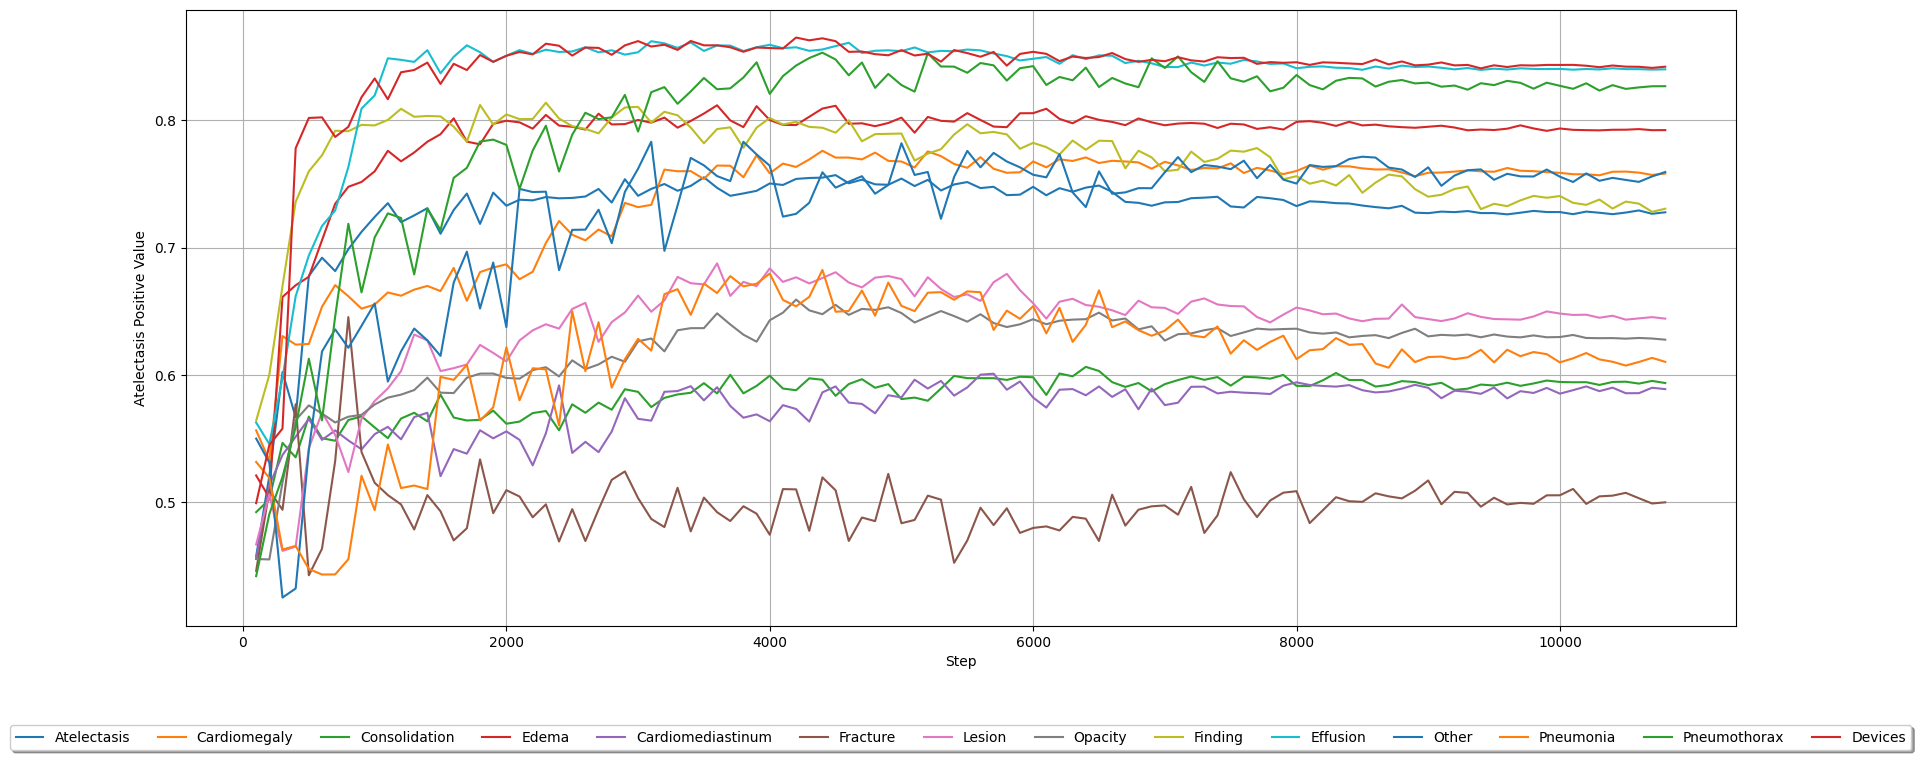

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7548883677446957, 'Cardiomegaly': 0.7759480267366703, 'Consolidation': 0.5961763170325436, 'Edema': 0.8091133720930233, 'Cardiomediastinum': 0.5862780269058296, 'Fracture': 0.5195028915959148, 'Lesion': 0.6760600753595499, 'Opacity': 0.6476371308016877, 'Finding': 0.7940539908162966, 'Effusion': 0.8554787406686141, 'Other': 0.7590579710144928, 'Pneumonia': 0.6824035028193819, 'Pneumothorax': 0.8529900726737283, 'Devices': 0.8642508008395007, 'average_auc_in_iter': 0.7267028062215665, 'iteration': 4400}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7568254924020347, 'Cardiomegaly': 0.7759480267366703, 'Consolidation': 0.6062949058996097, 'Edema': 0.8116618217054263, 'Cardiomediastinum': 0.6009267563527653, 'Fracture': 0.6453795988679709, 'Lesion': 0.6875762882768136, 'Opacity': 0.6591009412528399, 'Finding': 0.8137119417390541, 'Effusion': 0.8619798766634209, 'Other': 0.783033865720201, 'Pneumonia'

In [11]:
# 读取log文本
def extract_performance(path='../log/densenet_clip_21.log', print_flag = False):
  import re
  import pandas as pd

  # Read the log file
  with open(path, 'r') as file:
      log_line = file.read()

  # Extract evaluation results using regular expressions
  eval_matches = re.finditer(r'######### Eval (\d+) #########(.*?)\n\n', log_line, re.DOTALL)

  eval_results = []

  for match in eval_matches:
      step, diseases_info = match.groups()
      step = int(step)

      # Extract accuracy
      accuracy_match = re.search(r'acc: (\d+\.\d+)', diseases_info)
      accuracy = float(accuracy_match.group(1))

      # Extract diseases results
      diseases_matches = re.findall(r'(\b\w+\b)\s*{\'positive\': ([\d.]+), \'negative\': ([\d.]+), \'uncertain\': ([\d.]+)}', diseases_info)
      diseases_results = {disease: {'positive': float(pos), 'negative': float(neg), 'uncertain': float(unc)} for disease, pos, neg, unc in diseases_matches}

      eval_results.append({'step': step, 'accuracy': accuracy, 'diseases_results': diseases_results})
  return eval_results
    

  # Convert to DataFrame
  df_list = []

  for result in eval_results:
      step = result['step']
      accuracy = result['accuracy']
      diseases_results = result['diseases_results']

      for disease, values in diseases_results.items():
          row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
          row_data.update({f'{disease}_{key}': value for key, value in values.items()})
          df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

#

eval_results = extract_performance()
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()
df = df_all
def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- dense_clip')
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))
  plt.title("")

  plt.show()
    
plot_14_class(df_all)
df_all

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

denseclipdisease_name = []
denseclipv = []
for i,j in best_label_auc.items():
  if i != "iteration":
    denseclipdisease_name.append(i)
    denseclipv.append(j)



#### plot densenet_clip_v_21.log

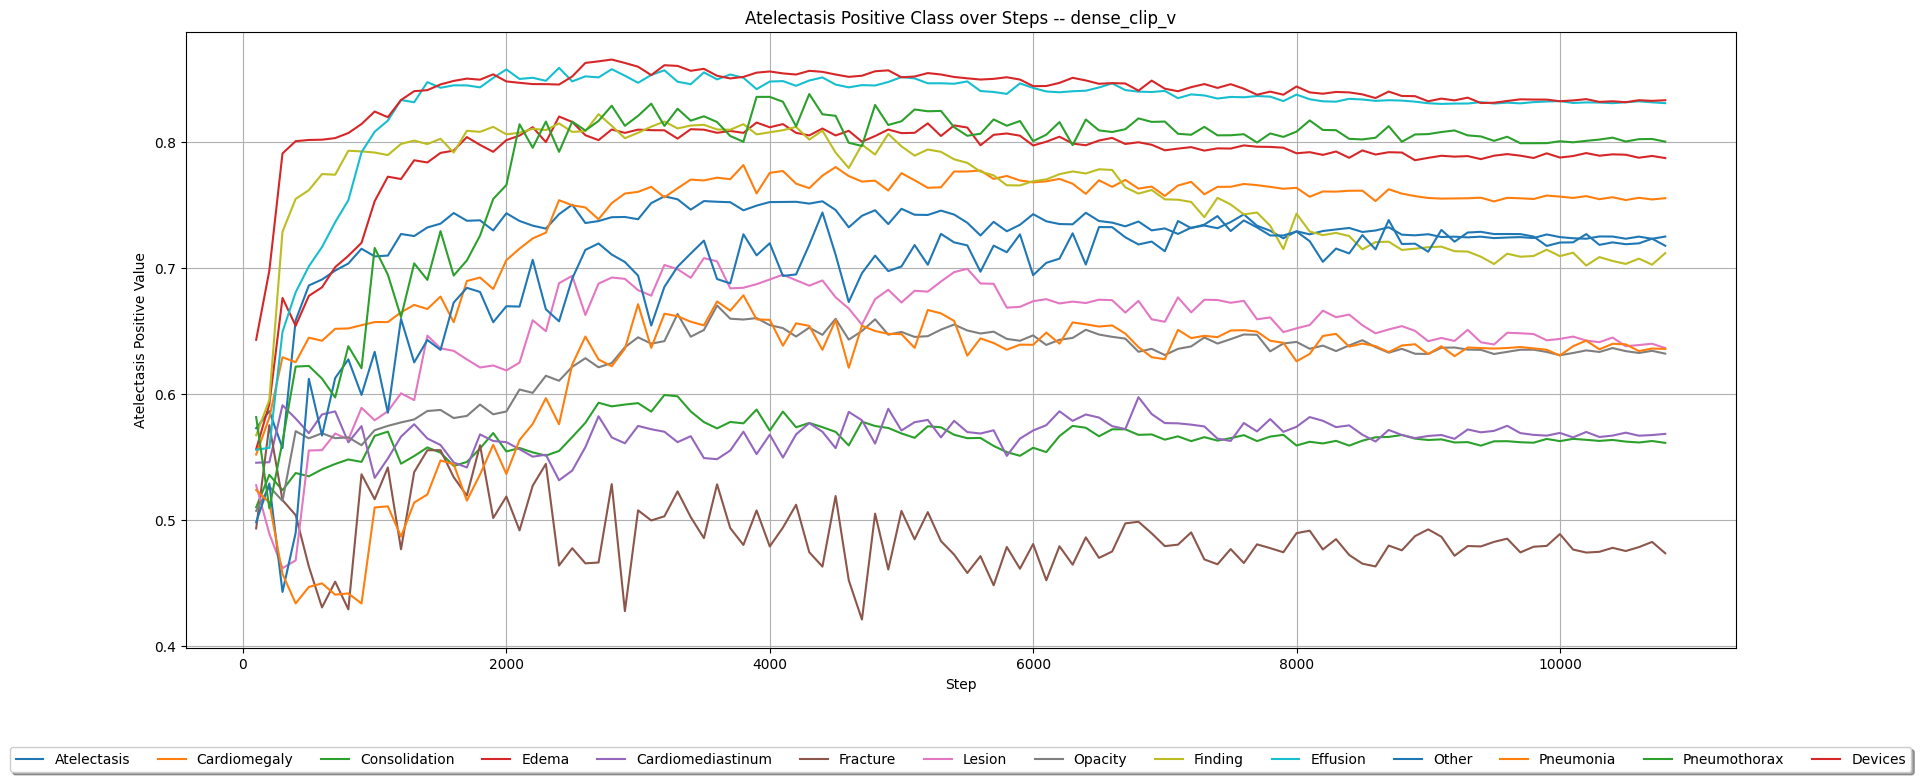

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7542149297247619, 'Cardiomegaly': 0.7629363276050973, 'Consolidation': 0.5979911990652115, 'Edema': 0.8022722868217054, 'Cardiomediastinum': 0.5616741405082212, 'Fracture': 0.5226405807801155, 'Lesion': 0.698800615613225, 'Opacity': 0.6633268419344368, 'Finding': 0.8103521394519025, 'Effusion': 0.8474066861408632, 'Other': 0.70075421472937, 'Pneumonia': 0.6615206889308969, 'Pneumothorax': 0.8259867952310835, 'Devices': 0.8599342068927429, 'average_auc_in_iter': 0.7192722609592594, 'iteration': 3300}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7565165031928884, 'Cardiomegaly': 0.7813784533027435, 'Consolidation': 0.5990851005643537, 'Edema': 0.8197819767441861, 'Cardiomediastinum': 0.5973094170403588, 'Fracture': 0.5751199704688077, 'Lesion': 0.7075837180915991, 'Opacity': 0.6699870172022071, 'Finding': 0.8216489719516833, 'Effusion': 0.8583966244725739, 'Other': 0.7437148772552499, 'Pneumonia': 

In [12]:
eval_results = extract_performance('../log/densenet_clip_v_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- dense_clip_v')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
  sns.set()
  
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

denseclipvdisease_name = []
denseclipv = []
for i,j in best_label_auc.items():
  if i != "iteration":
    denseclipvdisease_name.append(i)
    denseclipv.append(j)




#### plot clip_21.log

In [ ]:
eval_results = extract_performance('/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/clip_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- clip_21')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  sns.set(style="ticks")
  plt.grid(True)

  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

clipdisease_name = []
clip = []
for i,j in best_label_auc.items():
  if i != "iteration":
    clipdisease_name.append(i)
    clip.append(j)





#### plot clip_v_21.log

In [ ]:
eval_results = extract_performance('/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/clip_v_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- clip_v_21')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

clipVdisease_name = []
clipV = []
for i,j in best_label_auc.items():
  if i != "iteration":
    clipVdisease_name.append(i)
    clipV.append(j)

In [ ]:
## 交互式可视化
import plotly.express as px
import pandas as pd

def filter_df(disease='Atelectasis', class_n='positive', df=df_all):
    df_filtered = df[(df['Disease'] == disease) & (df['class_n'] == class_n)]
    return df_filtered

def plot_14_class(df_all):
    diseases = df_all['Disease'].unique()

    for disease in diseases:
        # Filter DataFrame for the specific disease
        filter_df_ = filter_df(disease=disease, df=df_all)

        # Use Plotly Express to create an interactive line plot
        fig = px.line(filter_df_, x='Step', y='v', 
                      labels={'v': 'Positive Value', 'Step': 'Step'},
                      title=f'{disease} Positive Class over Steps -- clip_v_21')

        # Refine y-axis ticks
        fig.update_yaxes(tickvals=[i/10 for i in range(11)])  # Adjust as needed

        # Add a red line at y=0.5
        fig.add_shape(
            go.layout.Shape(
                type='line',
                x0=0,
                y0=0.5,
                x1=filter_df_['Step'].max(),
                y1=0.5,
                line=dict(color='red', width=2)
            )
        )

        # Show each plot interactively
        fig.show()

# Assuming df_all is your DataFrame
plot_14_class(df_all)


#### biomedCLIP

##### biomedclip baseline---densenet

print the len of df 4536


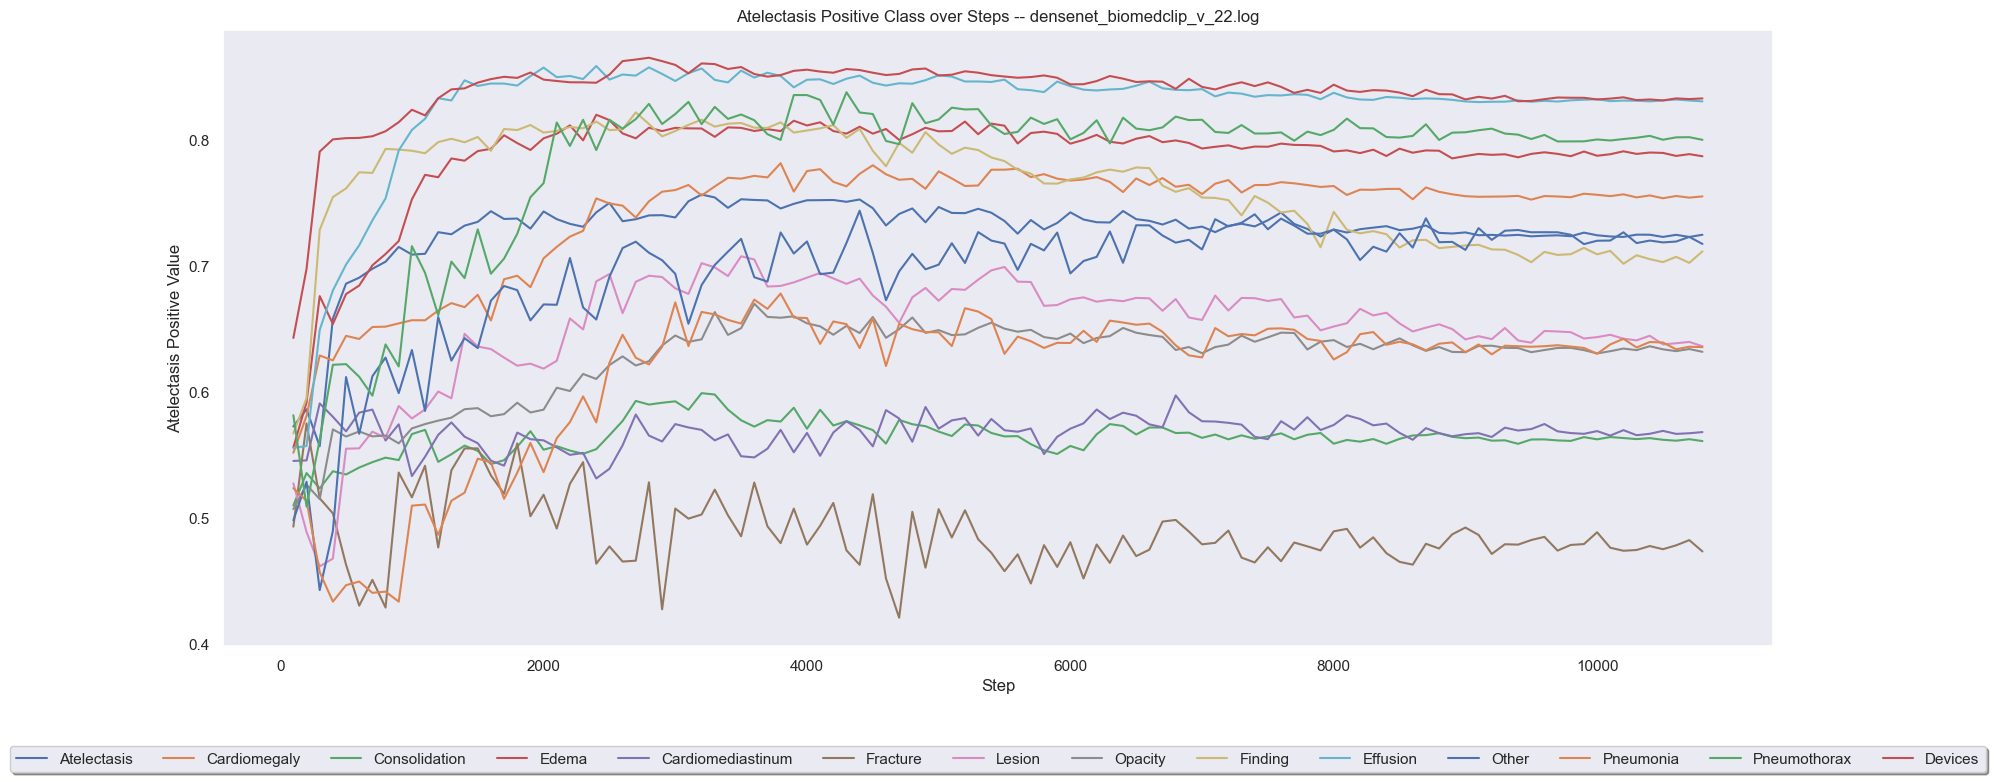

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7542149297247619, 'Cardiomegaly': 0.7629363276050973, 'Consolidation': 0.5979911990652115, 'Edema': 0.8022722868217054, 'Cardiomediastinum': 0.5616741405082212, 'Fracture': 0.5226405807801155, 'Lesion': 0.698800615613225, 'Opacity': 0.6633268419344368, 'Finding': 0.8103521394519025, 'Effusion': 0.8474066861408632, 'Other': 0.70075421472937, 'Pneumonia': 0.6615206889308969, 'Pneumothorax': 0.8259867952310835, 'Devices': 0.8599342068927429, 'average_auc_in_iter': 0.7192722609592594, 'iteration': 3300}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7565165031928884, 'Cardiomegaly': 0.7813784533027435, 'Consolidation': 0.5990851005643537, 'Edema': 0.8197819767441861, 'Cardiomediastinum': 0.5973094170403588, 'Fracture': 0.5751199704688077, 'Lesion': 0.7075837180915991, 'Opacity': 0.6699870172022071, 'Finding': 0.8216489719516833, 'Effusion': 0.8583966244725739, 'Other': 0.7437148772552499, 'Pneumonia': 

In [14]:
file_path = "../log/densenet_biomedclip_v_22.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)
            

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)
densebioVdisease_name = []
densebioVv = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebioVdisease_name.append(i)
    densebioVv.append(j)



print the len of df 4536


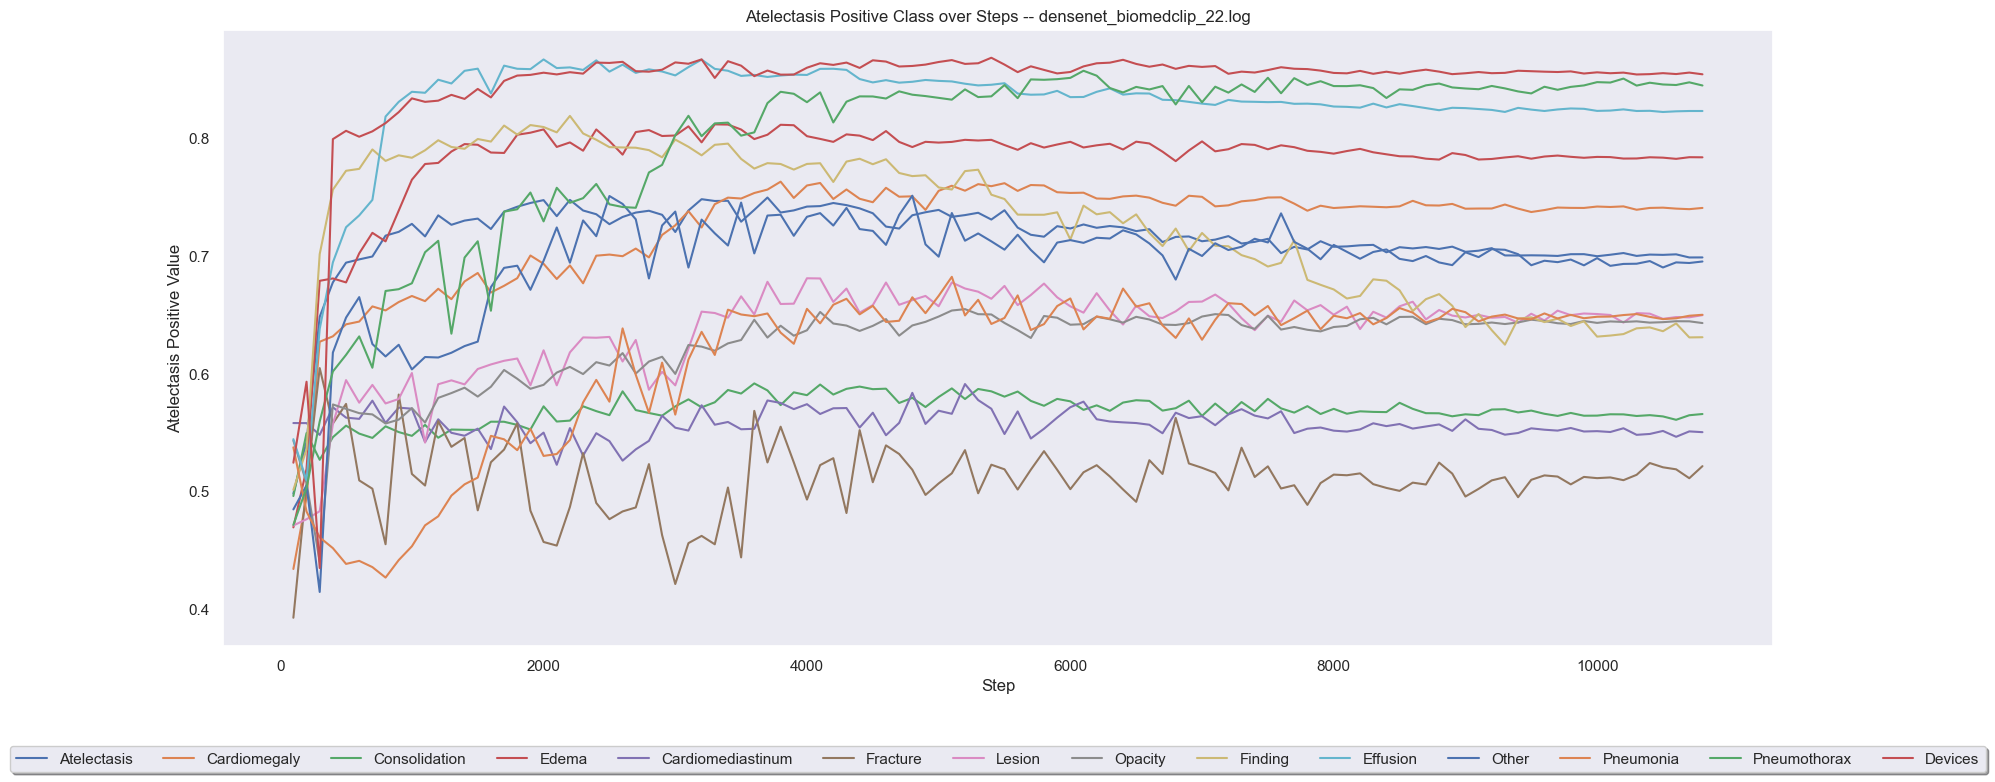

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7422475399705272, 'Cardiomegaly': 0.7619142161728913, 'Consolidation': 0.5905327797528777, 'Edema': 0.799389534883721, 'Cardiomediastinum': 0.5655007473841556, 'Fracture': 0.5220253476067429, 'Lesion': 0.6807302446531869, 'Opacity': 0.6522233041220383, 'Finding': 0.7786990728554297, 'Effusion': 0.8589289191820837, 'Other': 0.736265158237208, 'Pneumonia': 0.6425686265005737, 'Pneumothorax': 0.8389303187194225, 'Devices': 0.8636950458411575, 'average_auc_in_iter': 0.7166893468487154, 'iteration': 4100}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7495404775863982, 'Cardiomegaly': 0.7630245674409712, 'Consolidation': 0.5915023742634811, 'Edema': 0.8117344961240311, 'Cardiomediastinum': 0.5909566517189836, 'Fracture': 0.6045281161560231, 'Lesion': 0.6808894549700153, 'Opacity': 0.6546413502109704, 'Finding': 0.8189435816442923, 'Effusion': 0.8669295683219733, 'Other': 0.7510906536527654, 'Pneumonia':

In [17]:
file_path = "../log/densenet_biomedclip_22.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

densebiodisease_name = []
densebiov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebiodisease_name.append(i)
    densebiov.append(j)



In [44]:
file_path = "../log/biomedclip_22.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

biodisease_name = []
biov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    biodisease_name.append(i)
    biov.append(j)


FileNotFoundError: [Errno 2] No such file or directory: '../log/biomedclip_22.log'

In [ ]:
file_path = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/biomedclip_v_22.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)


best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

bioVdisease_name = []
bioVv = []
for i,j in best_label_auc.items():
  if i != "iteration":
    bioVdisease_name.append(i)
    bioVv.append(j)
  

#### <font color=red>phased conclusion:</font>
从当前的可视化结果来说，
1. 加了line在已于分割的label上，相较于single visual branch来说没有优势（甚至还有有所下降）
2. 加了line对于分类结果较差的label，有一定的提升能力（fracture）

In [45]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
import numpy as np 

a = np.array([densebioVv, densebiov, biov,bioVv])
print(a)
df = {}
for i, j in enumerate(bioVdisease_name):
  df[j] = a[:, i]
df["group"] =['densebiomedclipV','densebiomedclip','biomed','biomedV']
# Set data
df = pd.DataFrame(df)
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.5,0.8,1 ], ["0.1","0.5", "0.8","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=' '+df['group'][row], color=my_palette(row))

NameError: name 'biov' is not defined

In [ ]:
a = np.array([densebioVv, densebiov, biov, bioVv])
df = {}

df["group"] = ['densebiomedclipV', 'densebiomedclip', 'biomed', 'biomedV']
for i, j in enumerate(bioVdisease_name):
    df[j] = a[:, i]
df = pd.DataFrame(df)
# Function to create spider plot for one line of the dataset
def make_spider(ax, row, title, color):
    categories = list(df)[1:]
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.1, 0.5, 0.8, 1], ["0.1", "0.5", "0.8", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=df['group'][row])
    ax.fill(angles, values, color=color, alpha=0.4)

    ax.set_title(title, size=11, color=color, y=1.1)

# Initialize the figure
my_dpi = 96
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

# Create a color palette
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(ax=ax, row=row, title=' '+df['group'][row], color=my_palette(row))

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


print the len of df 4536


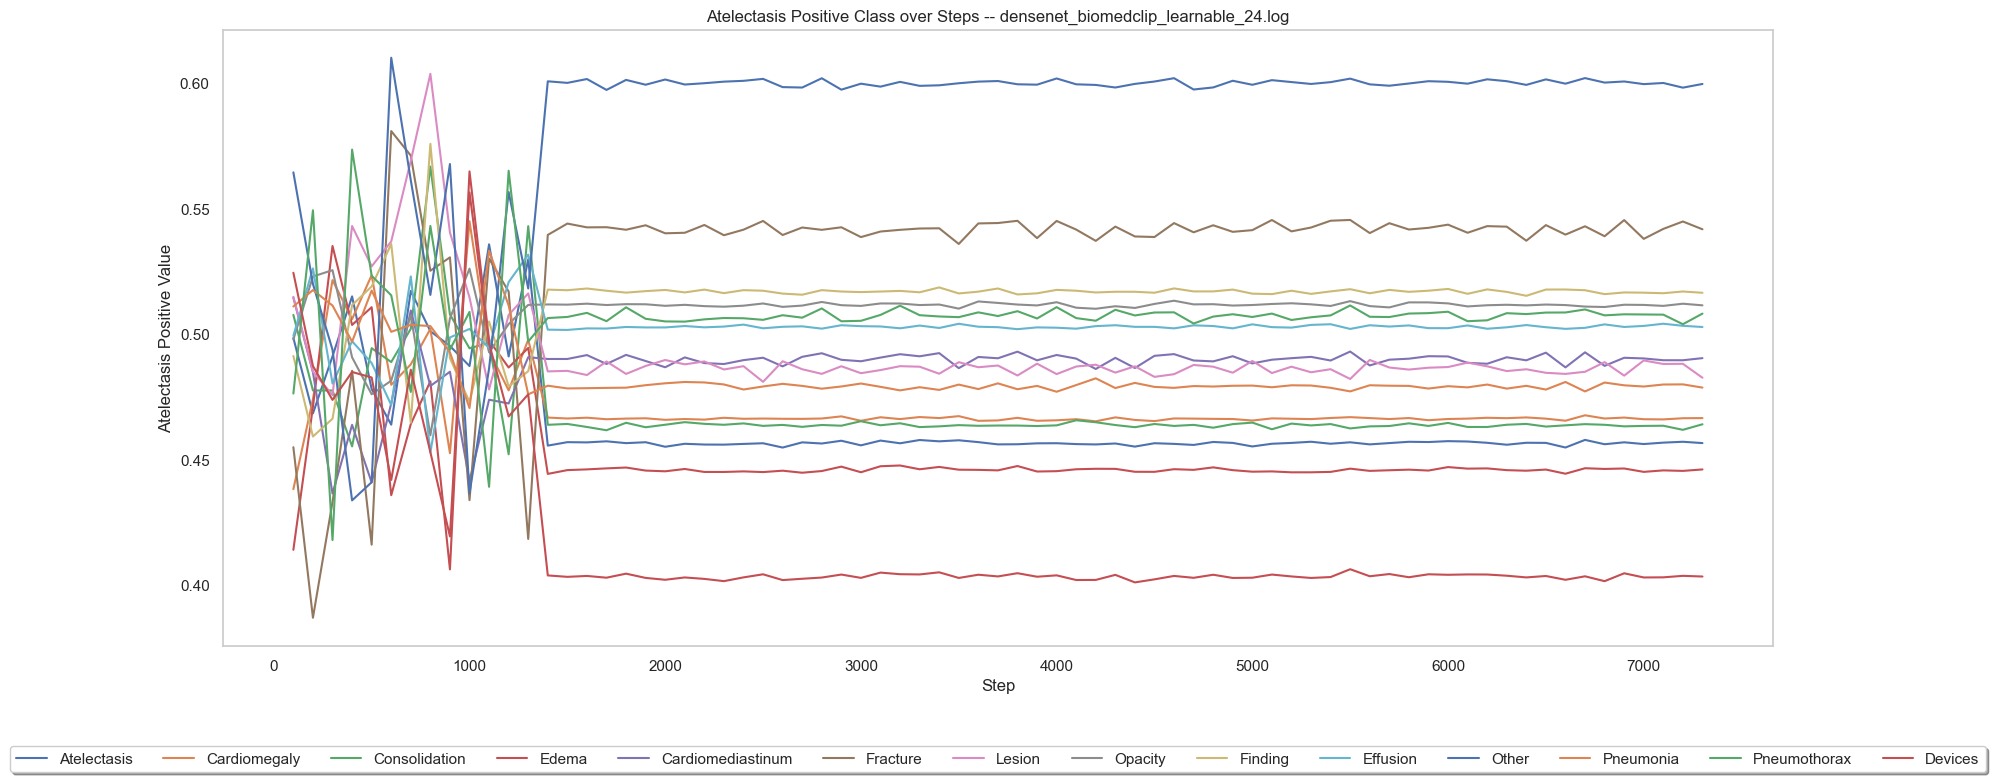

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.50108344293207, 'Cardiomegaly': 0.5019927496268191, 'Consolidation': 0.5667155607488252, 'Edema': 0.48110222868217056, 'Cardiomediastinum': 0.47924514200298957, 'Fracture': 0.5251937984496124, 'Lesion': 0.6036989863609828, 'Opacity': 0.4595813047711782, 'Finding': 0.5757838320025737, 'Effusion': 0.45274910743265173, 'Other': 0.5155556787932564, 'Pneumonia': 0.5031344416977688, 'Pneumothorax': 0.5430342469006794, 'Devices': 0.4528764636032255, 'average_auc_in_iter': 0.5115533560003431, 'iteration': 800}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.5357100413570172, 'Cardiomegaly': 0.5449195914495599, 'Consolidation': 0.5667155607488252, 'Edema': 0.5647868217054264, 'Cardiomediastinum': 0.5144768310911808, 'Fracture': 0.5808724006398425, 'Lesion': 0.6036989863609828, 'Opacity': 0.5260223953261928, 'Finding': 0.5757838320025737, 'Effusion': 0.5316114897760468, 'Other': 0.610100561963916, 'Pneumonia'

In [49]:
file_path = "../log/densenet_biomedclip_learnable_24.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)
            

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)
densebioVdisease_name = []
densebioVv = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebioVdisease_name.append(i)
    densebioVv.append(j)



print the len of df 4536


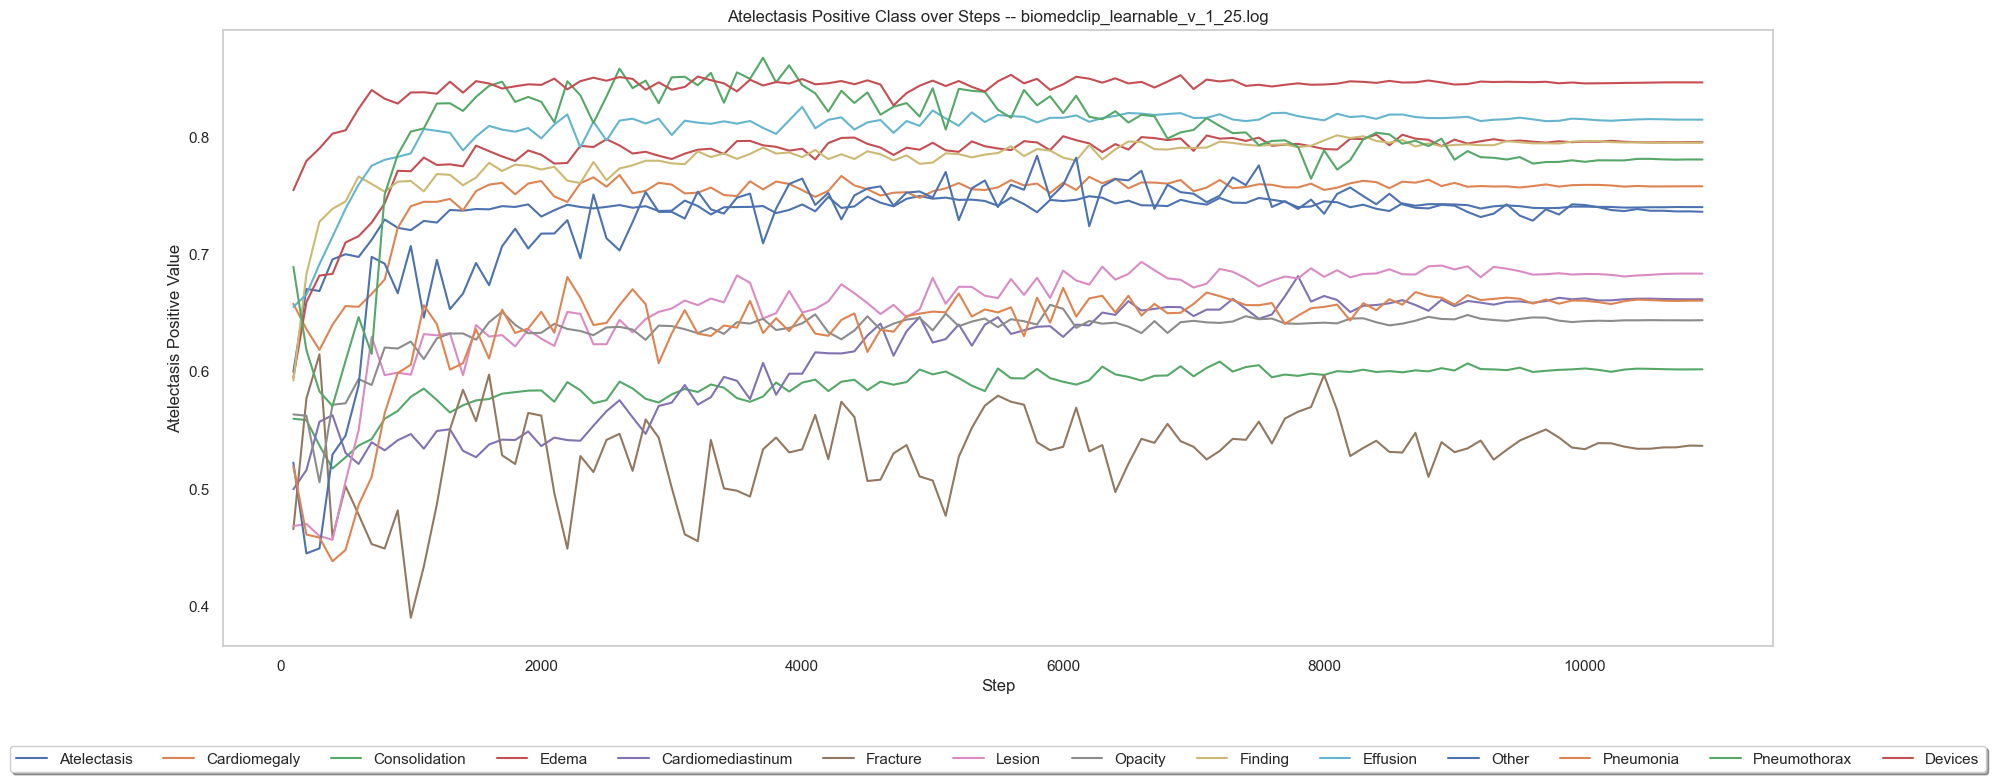

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7463158978909505, 'Cardiomegaly': 0.7547594361474488, 'Consolidation': 0.5886308828282326, 'Edema': 0.7971899224806203, 'Cardiomediastinum': 0.6398056801195815, 'Fracture': 0.5689061154177433, 'Lesion': 0.677466433158202, 'Opacity': 0.6370496592015579, 'Finding': 0.7797958527097775, 'Effusion': 0.8183317104836093, 'Other': 0.7823314108251997, 'Pneumonia': 0.6467047969883508, 'Pneumothorax': 0.8351778843870232, 'Devices': 0.8513510714680217, 'average_auc_in_iter': 0.7231297681504515, 'iteration': 6100}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7495721687873362, 'Cardiomegaly': 0.7674733258329473, 'Consolidation': 0.6082092335231086, 'Edema': 0.8020445736434108, 'Cardiomediastinum': 0.6811659192825112, 'Fracture': 0.6144333702473237, 'Lesion': 0.6933609297882503, 'Opacity': 0.6567023693605973, 'Finding': 0.8013292971834693, 'Effusion': 0.8255761116520609, 'Other': 0.783958148476782, 'Pneumonia':

In [50]:
file_path = "../log/biomedclip_learnable_v_1_25.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

densebiodisease_name = []
densebiov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebiodisease_name.append(i)
    densebiov.append(j)



print the len of df 4536


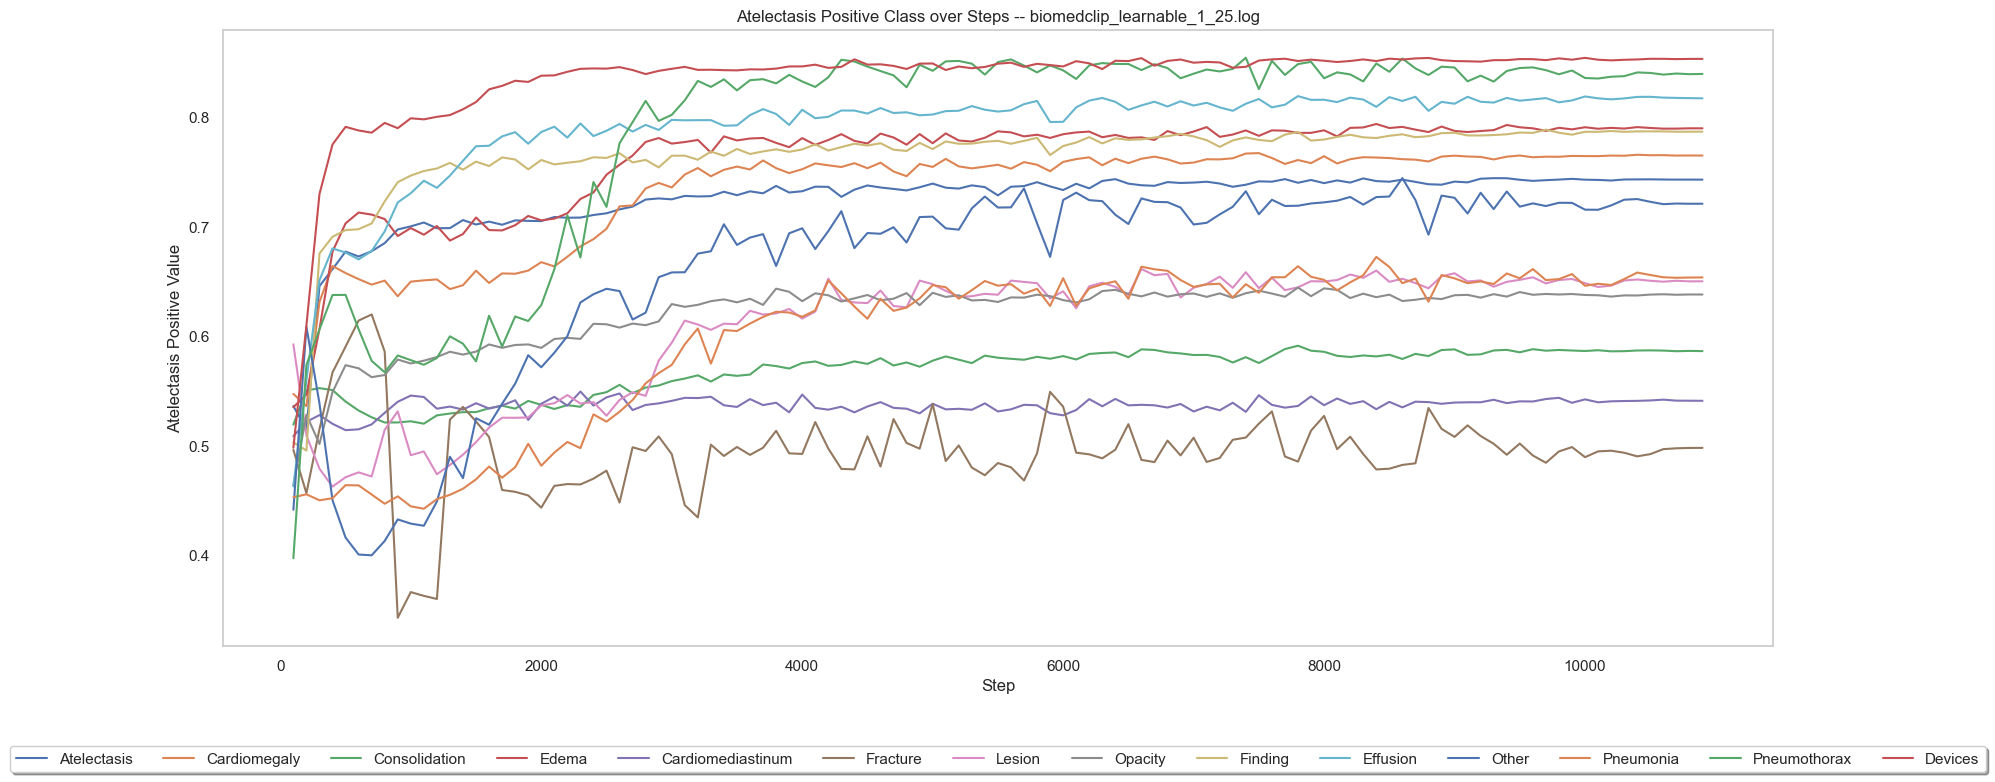

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7381712592498693, 'Cardiomegaly': 0.763848139242461, 'Consolidation': 0.5872386445565969, 'Edema': 0.79125, 'Cardiomediastinum': 0.5381464872944693, 'Fracture': 0.5153193060169804, 'Lesion': 0.6544870774292841, 'Opacity': 0.6337228172671211, 'Finding': 0.7852066333245591, 'Effusion': 0.8137520285621551, 'Other': 0.7281869269446909, 'Pneumonia': 0.6556476499765724, 'Pneumothorax': 0.8459126965278109, 'Devices': 0.8518688556279685, 'average_auc_in_iter': 0.7073398944300386, 'iteration': 8900}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7441252436261072, 'Cardiomegaly': 0.7669806534159846, 'Consolidation': 0.5911543146955721, 'Edema': 0.79359496124031, 'Cardiomediastinum': 0.5493273542600897, 'Fracture': 0.619724375538329, 'Lesion': 0.6612004457888871, 'Opacity': 0.6442486205777345, 'Finding': 0.7884092304992543, 'Effusion': 0.8190295358649788, 'Other': 0.7441770186335404, 'Pneumonia': 0.6722246457

In [51]:
file_path = "../log/biomedclip_learnable_1_25.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

densebiodisease_name = []
densebiov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebiodisease_name.append(i)
    densebiov.append(j)



print the len of df 4536


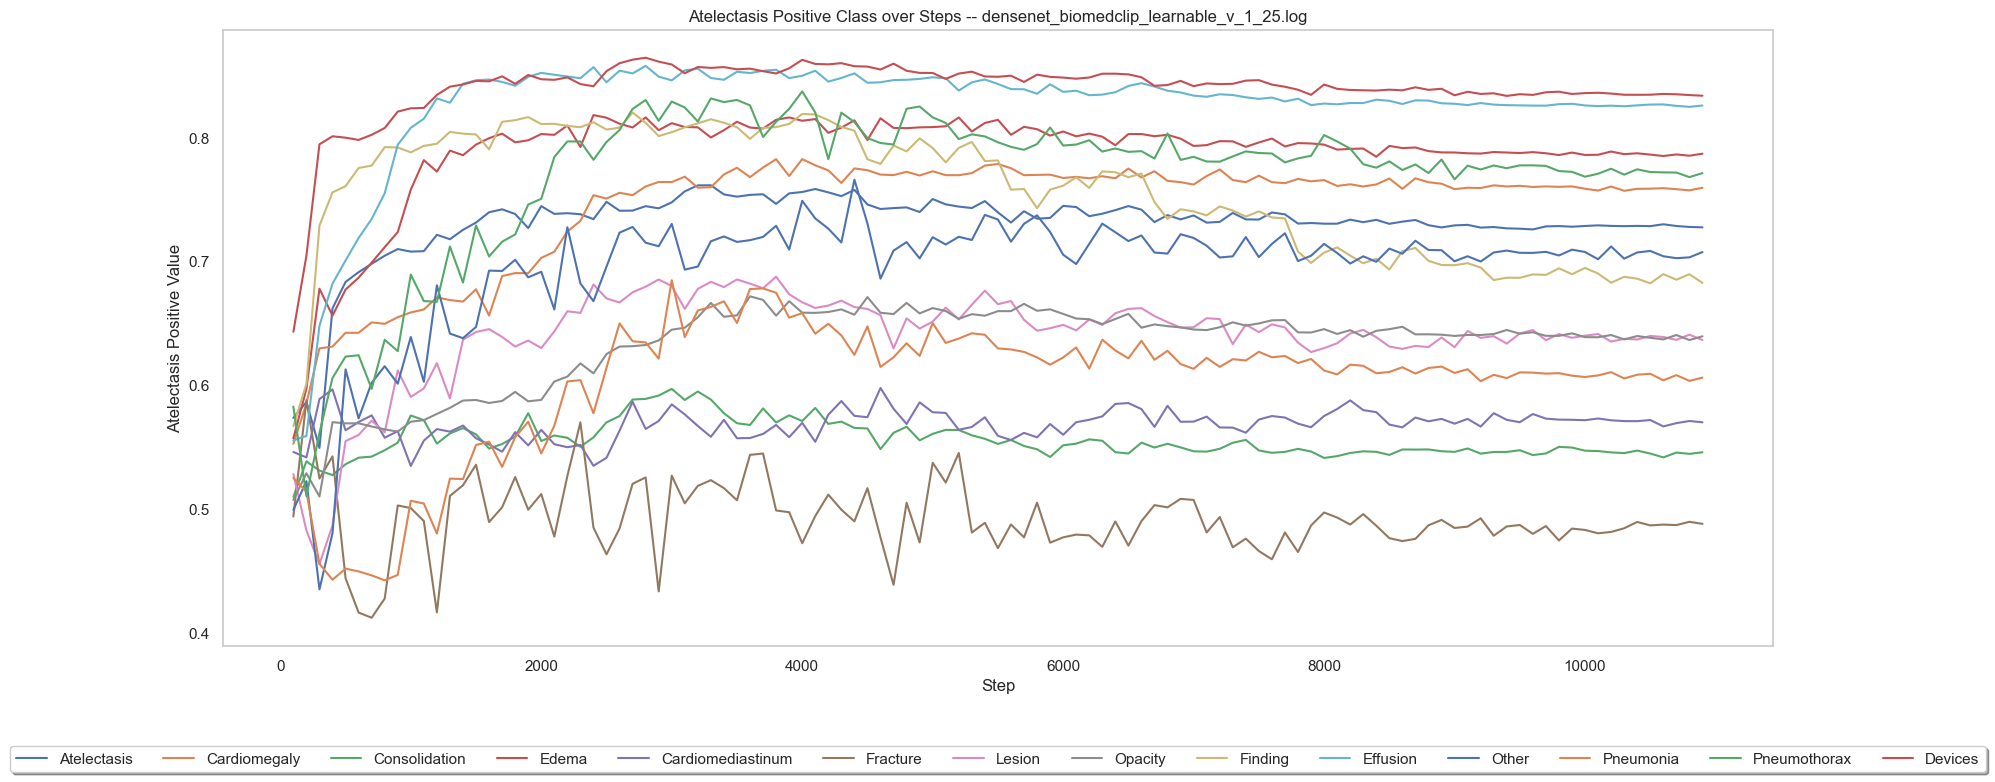

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7476033529290592, 'Cardiomegaly': 0.7639804989962717, 'Consolidation': 0.5968724361683613, 'Edema': 0.8115939922480621, 'Cardiomediastinum': 0.5843647234678625, 'Fracture': 0.5267626430417128, 'Lesion': 0.6800137982274584, 'Opacity': 0.644706264199935, 'Finding': 0.8042832909245122, 'Effusion': 0.8461603375527426, 'Other': 0.7301464063886425, 'Pneumonia': 0.684673549512869, 'Pneumothorax': 0.8290504916163967, 'Devices': 0.8589935656688391, 'average_auc_in_iter': 0.7220860964959088, 'iteration': 3000}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7614167551379359, 'Cardiomegaly': 0.7825108645297918, 'Consolidation': 0.5968724361683613, 'Edema': 0.8181346899224806, 'Cardiomediastinum': 0.5975784753363229, 'Fracture': 0.5877322505229482, 'Lesion': 0.6875497532240089, 'Opacity': 0.6716682895163908, 'Finding': 0.8201792869468575, 'Effusion': 0.8579065238558908, 'Other': 0.7658976634131914, 'Pneumonia':

In [52]:
file_path = "../log/densenet_biomedclip_learnable_v_1_25.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

densebiodisease_name = []
densebiov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebiodisease_name.append(i)
    densebiov.append(j)



print the len of df 4536


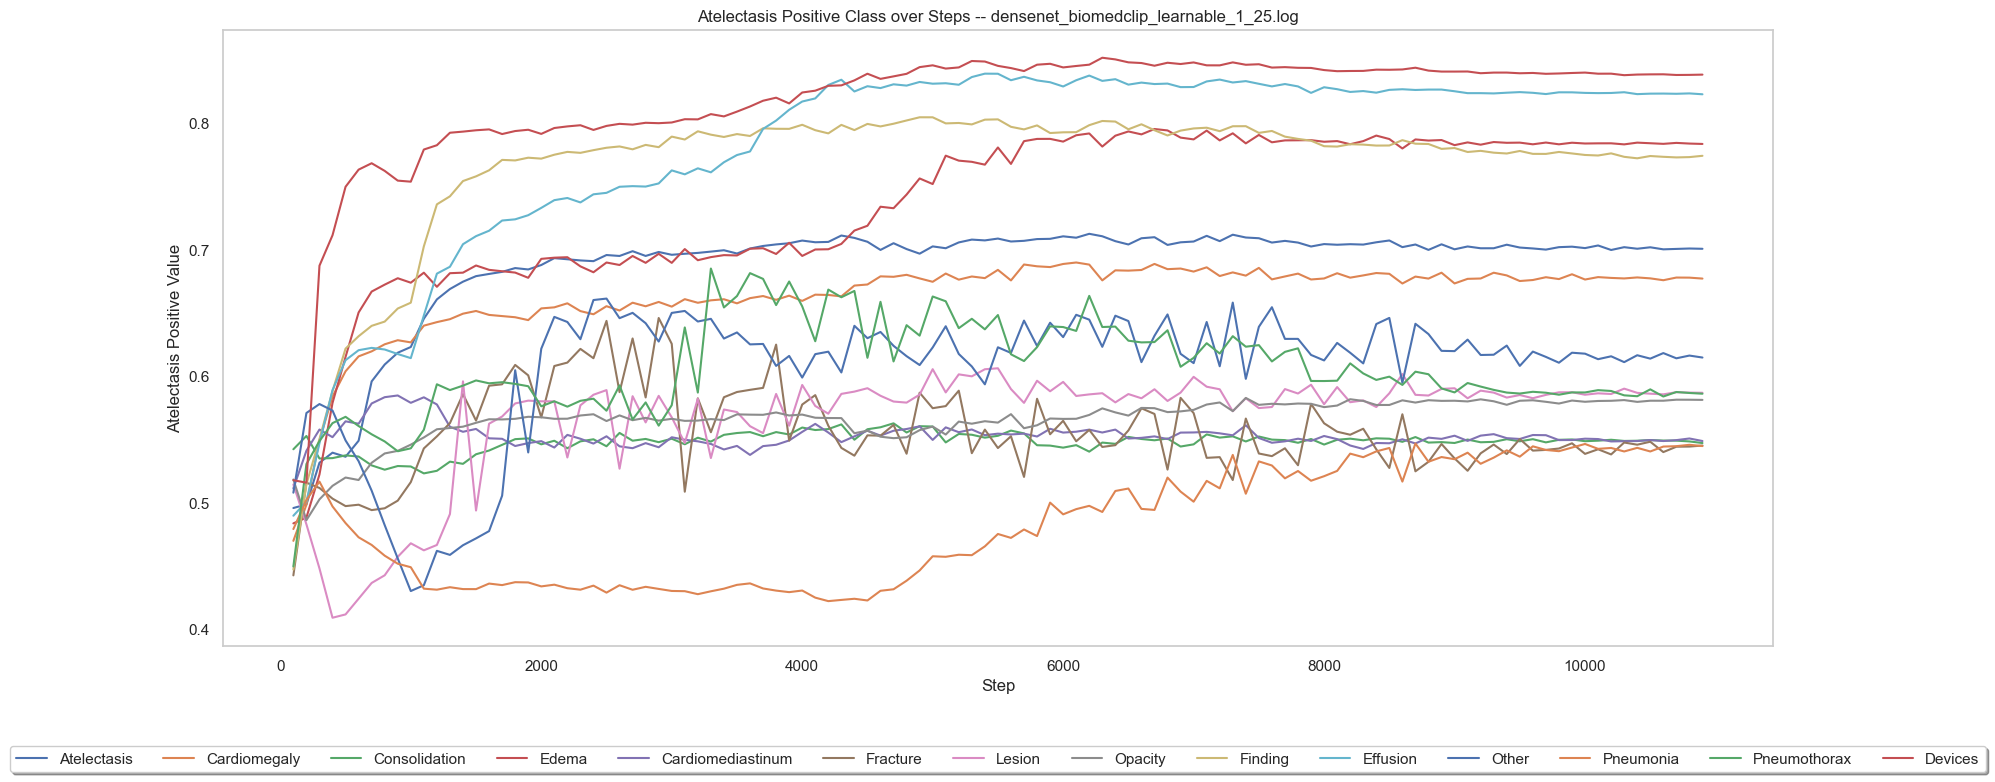

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7125449618913309, 'Cardiomegaly': 0.6882082165993838, 'Consolidation': 0.5403376177808716, 'Edema': 0.7918846899224806, 'Cardiomediastinum': 0.5577428998505232, 'Fracture': 0.5575243017103482, 'Lesion': 0.58560208034814, 'Opacity': 0.5693670886075949, 'Finding': 0.7984337983679916, 'Effusion': 0.8376338851022396, 'Other': 0.644687222715173, 'Pneumonia': 0.4974956780249786, 'Pneumothorax': 0.6634921388875694, 'Devices': 0.8462595272285431, 'average_auc_in_iter': 0.6636581505026549, 'iteration': 6200}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7125449618913309, 'Cardiomegaly': 0.6898663901818476, 'Consolidation': 0.5627377371155806, 'Edema': 0.7953972868217054, 'Cardiomediastinum': 0.5847533632286995, 'Fracture': 0.6459948320413436, 'Lesion': 0.6062463514302393, 'Opacity': 0.5827977929243753, 'Finding': 0.8046708198063819, 'Effusion': 0.8391528724440117, 'Other': 0.6613427979887607, 'Pneumonia': 

In [53]:
file_path = "../log/densenet_biomedclip_learnable_1_25.log"
log_name = file_path.split("/")[-1]
eval_results = extract_performance(file_path)
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

print(f"print the len of df {len(df)}")

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)

best_label_auc, best_auc_in_each_label = get_best(df_all)
print("best_label_auc, best_auc_in_each_label")
print(best_label_auc, "\n",best_auc_in_each_label)

densebiodisease_name = []
densebiov = []
for i,j in best_label_auc.items():
  if i != "iteration":
    densebiodisease_name.append(i)
    densebiov.append(j)



In [54]:
# plot and print result
def get_df(eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  print(f"print the len of df {len(df)}")

  return df

def filter_df(df,disease='Atelectasis', class_n='positive', ):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]

def plot_14_class(df_all, log_name):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  sns.set_theme(style="whitegrid")  # 使用预定义的主题，比如 "whitegrid"
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    sns.set_theme(style="whitegrid")  # 使用预定义的主题，比如 "whitegrid"
    plt.title(f'Atelectasis Positive Class over Steps -- {log_name}')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')

  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))

  plt.show()

def plot_and_print(file_path):
  log_name = file_path.split("/")[-1]
  eval_results = extract_performance(file_path)
  df_all = get_df(eval_results)
  plot_14_class(df_all, log_name)
  best_label_auc, best_auc_in_each_label = get_best(df_all)
  print("best_label_auc, best_auc_in_each_label")
  print(best_label_auc, "\n",best_auc_in_each_label)
  densebiodisease_name = []
  densebiov = []
  for i,j in best_label_auc.items():
    if i != "iteration":
      densebiodisease_name.append(i)
      densebiov.append(j)
      


# 创建示例数据


----
#### 
1. densenet + biomed_learnable_graph
2. biomed_learnable_graph
3. densenet + biomed_learnable
4. biomed + learnable

dense_biomed_learnable_grpah
print the len of df 4578


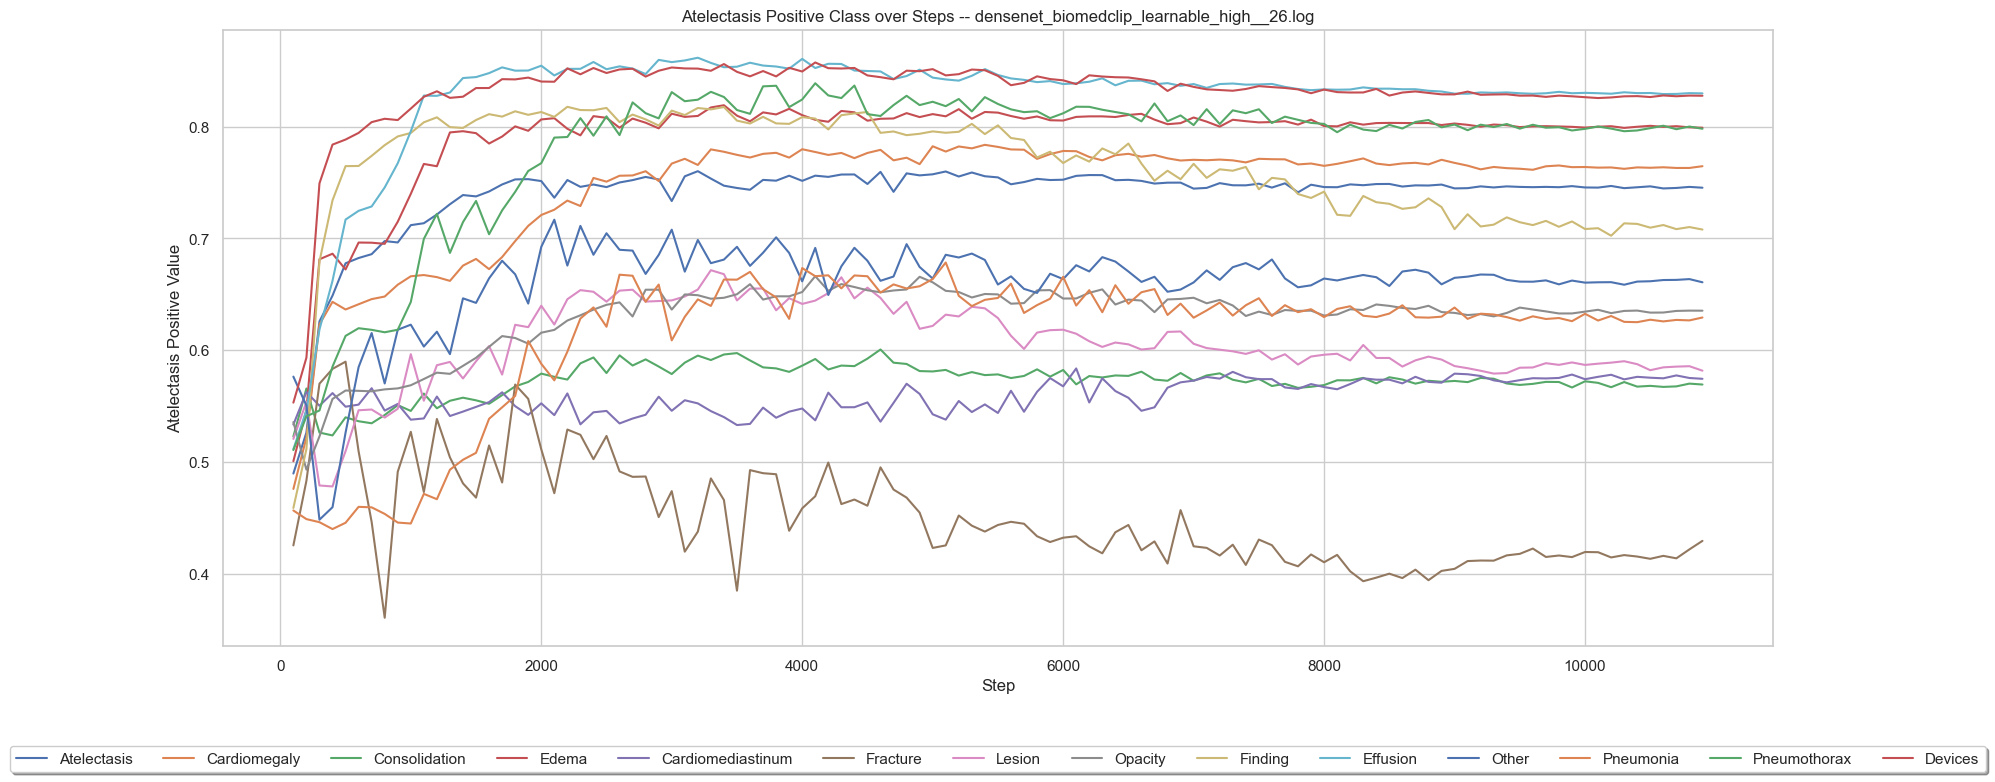

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7561877069831562, 'Cardiomegaly': 0.7773635407704809, 'Consolidation': 0.5921612013027372, 'Edema': 0.8061579457364341, 'Cardiomediastinum': 0.5372795216741406, 'Fracture': 0.4693613879660391, 'Lesion': 0.6444037573634772, 'Opacity': 0.666264199935086, 'Finding': 0.8072519083969466, 'Effusion': 0.8524894514767933, 'Other': 0.6915483584738242, 'Pneumonia': 0.6662465868515018, 'Pneumothorax': 0.8388590699662756, 'Devices': 0.8574643764497957, 'average_auc_in_iter': 0.7116456438104778, 'iteration': 4100}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7602006053019379, 'Cardiomegaly': 0.783764605531167, 'Consolidation': 0.6006513686199438, 'Edema': 0.8191957364341085, 'Cardiomediastinum': 0.5836920777279522, 'Fracture': 0.5897625199950782, 'Lesion': 0.6716021864883511, 'Opacity': 0.666264199935086, 'Finding': 0.8178029305957707, 'Effusion': 0.8616975008114248, 'Other': 0.7167812777284828, 'Pneumonia': 

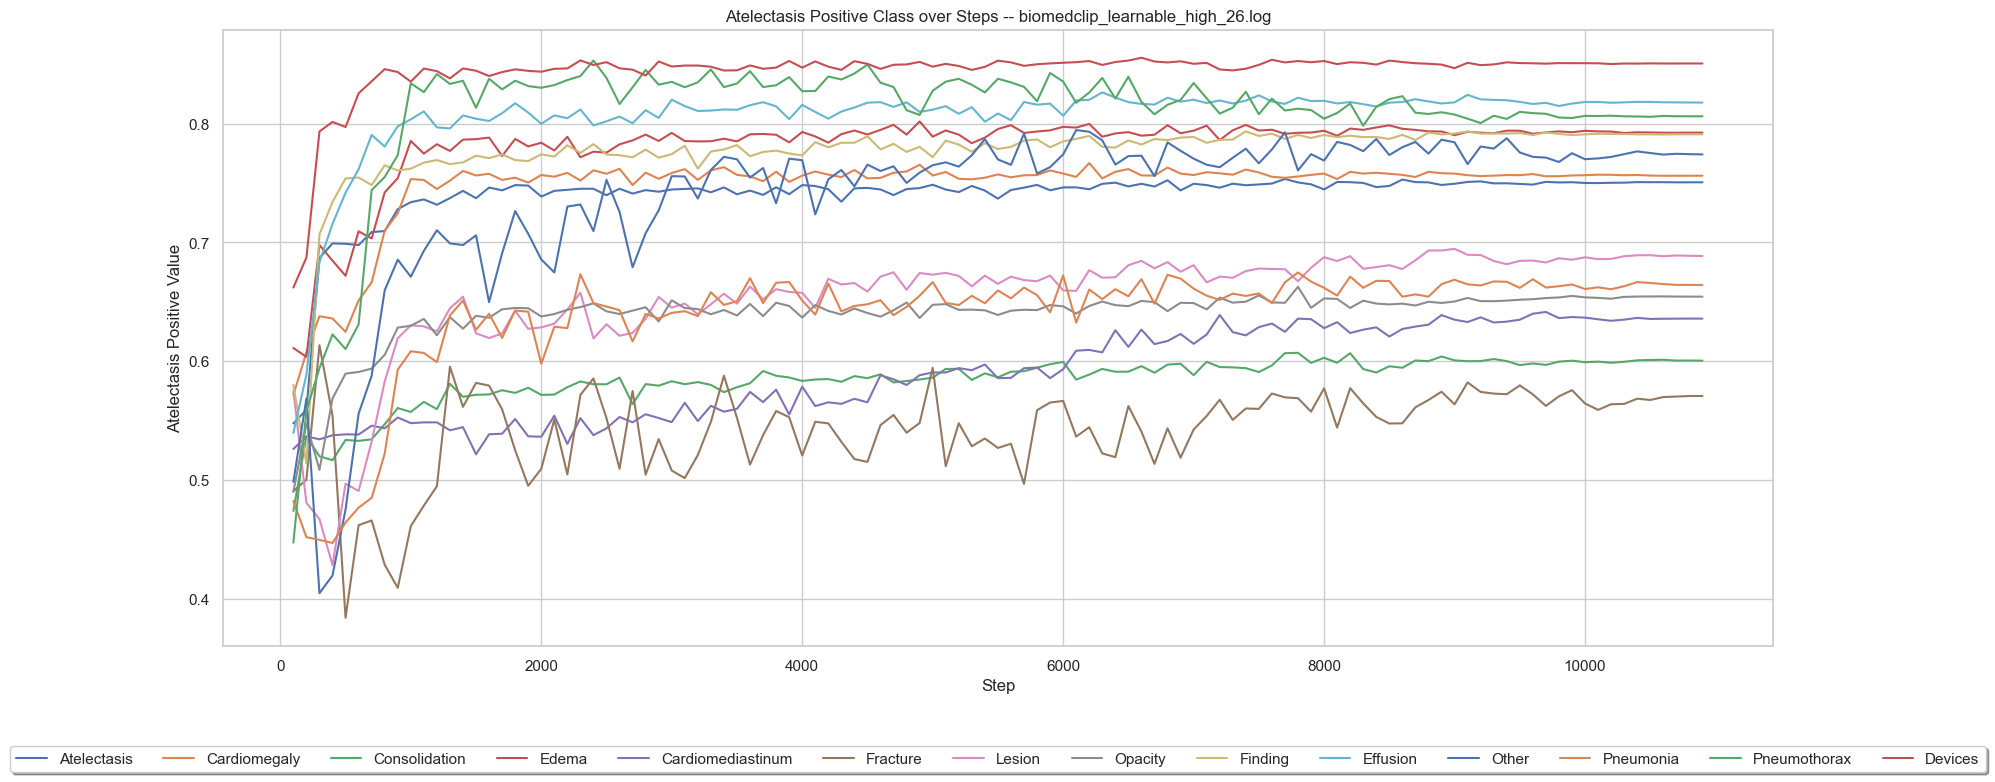

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7483877101522762, 'Cardiomegaly': 0.7582853529225769, 'Consolidation': 0.6040200880093478, 'Edema': 0.7934156976744187, 'Cardiomediastinum': 0.6388789237668162, 'Fracture': 0.5743816906607604, 'Lesion': 0.6932813246298359, 'Opacity': 0.6490847127555988, 'Finding': 0.790990319089819, 'Effusion': 0.816994482310938, 'Other': 0.7864906832298136, 'Pneumonia': 0.6649378766581034, 'Pneumothorax': 0.8095995820073149, 'Devices': 0.8497217773113884, 'average_auc_in_iter': 0.7270335872270721, 'iteration': 8900}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7534464181020141, 'Cardiomegaly': 0.7668004970844087, 'Consolidation': 0.6071277627228202, 'Edema': 0.8018653100775193, 'Cardiomediastinum': 0.64152466367713, 'Fracture': 0.6135105204872646, 'Lesion': 0.6946080772700738, 'Opacity': 0.6627198961376177, 'Finding': 0.7935348483519055, 'Effusion': 0.8263388510223953, 'Other': 0.794605885832594, 'Pneumonia': 0.

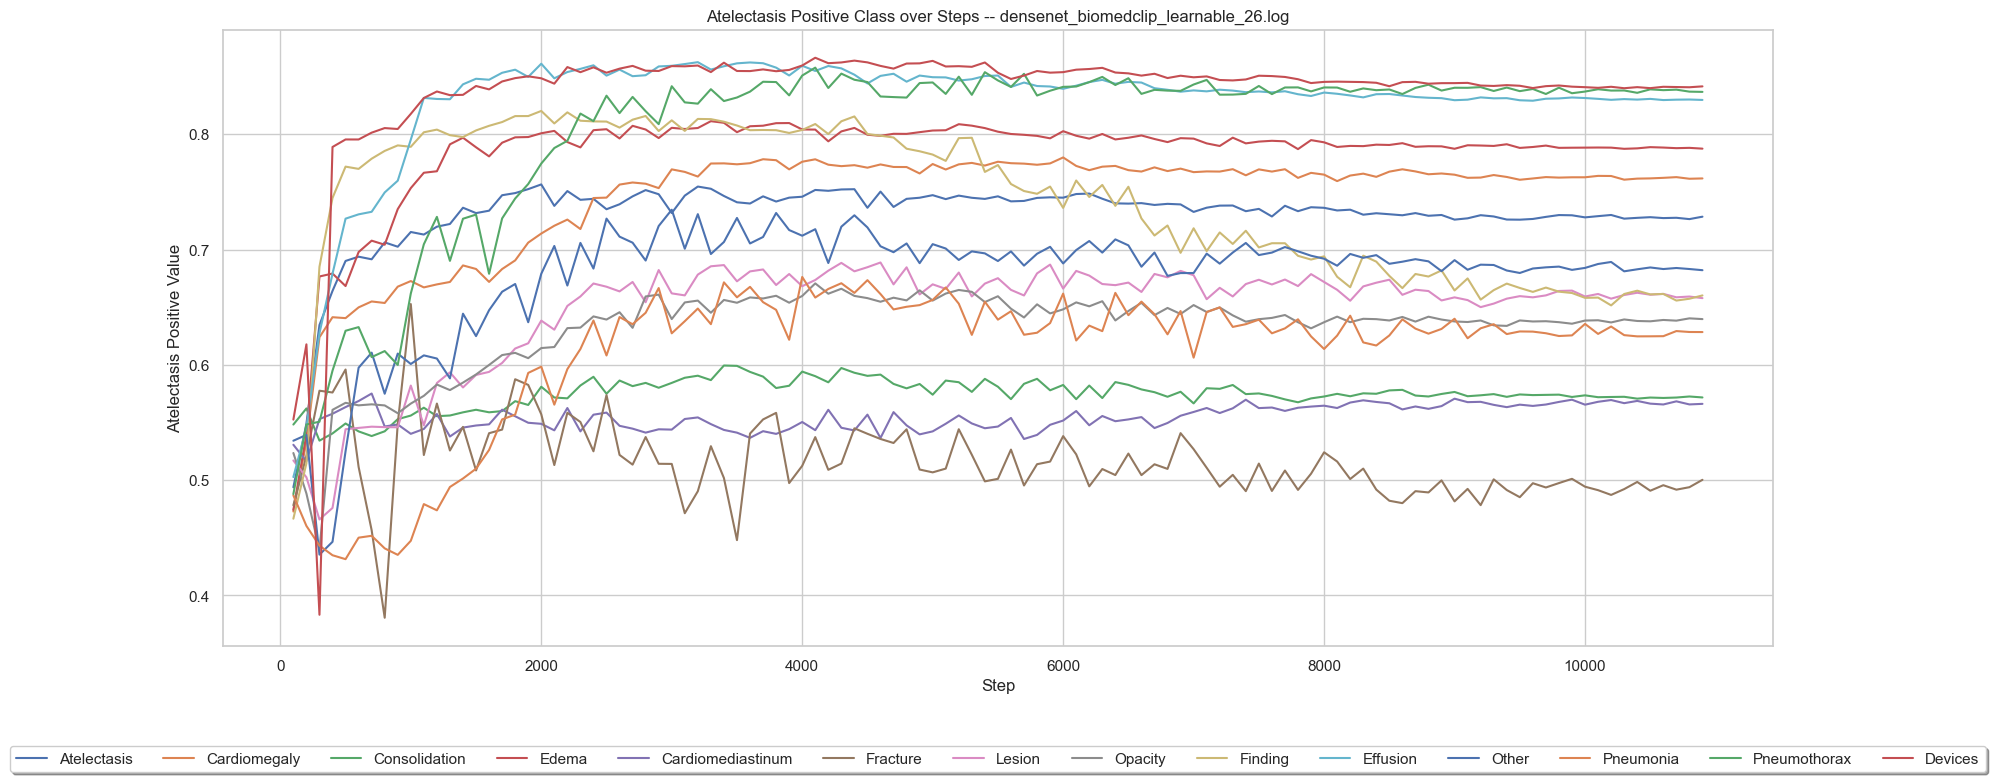

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7523094962683612, 'Cardiomegaly': 0.7731500886075019, 'Consolidation': 0.5931059344156328, 'Edema': 0.8054699612403101, 'Cardiomediastinum': 0.5430642750373692, 'Fracture': 0.5449120216562078, 'Lesion': 0.6810752003396487, 'Opacity': 0.6597533268419344, 'Finding': 0.8154338861103799, 'Effusion': 0.8516228497241156, 'Other': 0.7296842650103519, 'Pneumonia': 0.6623850839351785, 'Pneumothorax': 0.8472426732532181, 'Devices': 0.8638434773003424, 'average_auc_in_iter': 0.7230751814100396, 'iteration': 4400}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7564610435912469, 'Cardiomegaly': 0.7798599927937467, 'Consolidation': 0.599383437336847, 'Edema': 0.811312984496124, 'Cardiomediastinum': 0.5750822122571002, 'Fracture': 0.6527008736311062, 'Lesion': 0.6887438306002229, 'Opacity': 0.6706134371957158, 'Finding': 0.8201939106782486, 'Effusion': 0.8624959428756896, 'Other': 0.7345090209997043, 'Pneumonia':

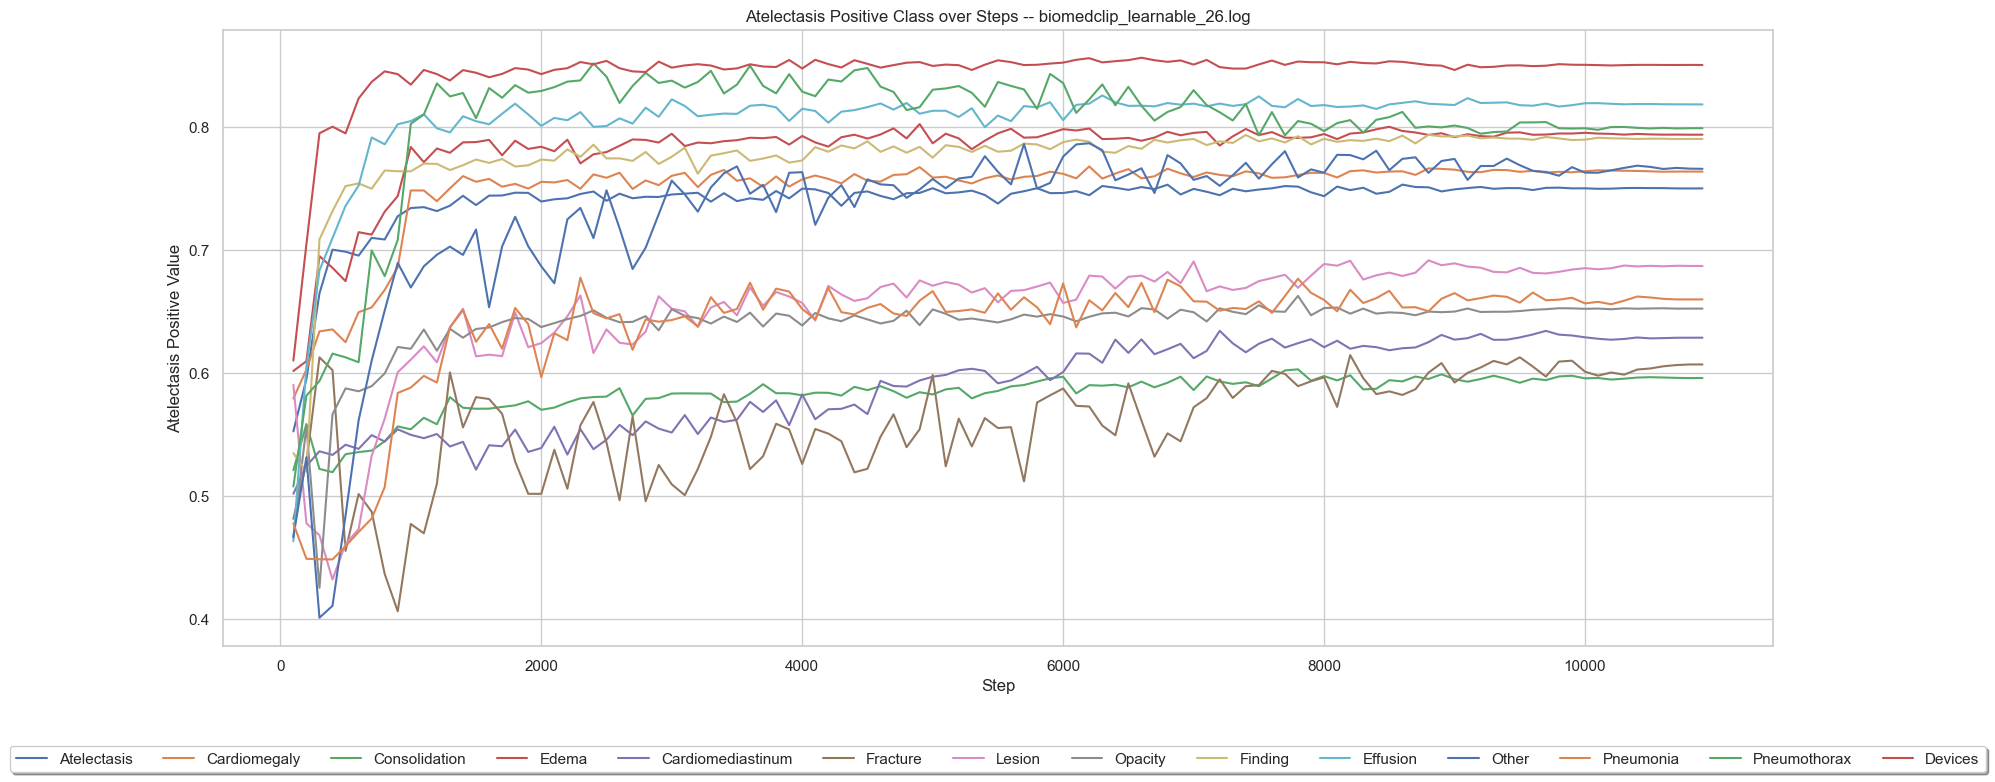

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7485976643584908, 'Cardiomegaly': 0.7639952056355842, 'Consolidation': 0.5979166148720881, 'Edema': 0.7945784883720929, 'Cardiomediastinum': 0.6195515695067264, 'Fracture': 0.6143718469299864, 'Lesion': 0.6911585204054556, 'Opacity': 0.6480558260305095, 'Finding': 0.7892354713228628, 'Effusion': 0.8165822784810127, 'Other': 0.7770814847678201, 'Pneumonia': 0.6675391401289322, 'Pneumothorax': 0.8055384030779461, 'Devices': 0.8529354909974592, 'average_auc_in_iter': 0.7276527146347835, 'iteration': 8200}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7530661236907573, 'Cardiomegaly': 0.7678373151559272, 'Consolidation': 0.6028018795216668, 'Edema': 0.8023207364341085, 'Cardiomediastinum': 0.6340956651718984, 'Fracture': 0.6143718469299864, 'Lesion': 0.6914504059863078, 'Opacity': 0.6625251541707238, 'Finding': 0.7935933432774707, 'Effusion': 0.8255826030509575, 'Other': 0.7867309967465248, 'Pneumonia

In [57]:
results = {"dense_biomed_learnable_grpah": "../log/densenet_biomedclip_learnable_high__26.log",
          "biomed_learnable_graph": "../log/biomedclip_learnable_high_26.log",
          "densenet_biomed_learnable":"../log/densenet_biomedclip_learnable_26.log",
          "biomed_learnable": "../log/biomedclip_learnable_26.log"}
sns.set_theme(style="whitegrid")  # 使用预定义的主题，比如 "whitegrid"

# 创建示例数据
for i, j in results.items():
  print(i)
  plot_and_print(j)
  

In [31]:
def is_float(value):
    try:
        float_value = float(value)
        return True
    except ValueError:
        return False

# 测试字符串
string_to_test = "123.45"

# 检查是否可以转换为浮点数
if is_float(string_to_test):
    print(f"{string_to_test} 可以转换为浮点数")
    float_value = float(string_to_test)
    print(f"转换后的浮点数值为: {float_value}")
else:
    print(f"{string_to_test} 不能转换为浮点数")


123.45 可以转换为浮点数
转换后的浮点数值为: 123.45


In [35]:
import re
log_path = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/biomedclip_learnable_high_26.log"

def parse_loss(line, list_):
      # 使用正则表达式提取各种loss值
      clip_loss_match = re.search(r'clip loss is (\S+)', line)
      graph_align_loss_match = re.search(r'graph_align loss is (\S+)', line)
      classification_loss_match = re.search(r'classification loss is (\S+)', line)
      orthogonal_loss_match = re.search(r'othogonal loss is (\S+)', line)
      total_loss_match = re.search(r'the total loss is (\S+)', line)
      if clip_loss_match:
          list_.append(float(clip_loss_match.group(1)))
      elif graph_align_loss_match:
          list_.append(float(graph_align_loss_match.group(1)))
      elif classification_loss_match:
          list_.append(float(classification_loss_match.group(1)))
      elif orthogonal_loss_match:
          list_.append(float(orthogonal_loss_match.group(1)))
      else:
        raise ValueError("error happen !!!")
      
      
      


def parse_log(log_path):
  alpha_list = []
  beta_list = []
  gamma_list = []
  delta_list = []

  clip_loss_list = []
  graph_align_loss_list = []
  classification_loss_list = []
  orthogonal_loss_list = []
  total_loss_list = []
  file_name = log_path.split("/")[-1].split(".")[0]

  # 读取log文件
  with open(log_path, "r") as log_file:
      # 逐行解析log文件
      for line in log_file:
          # 使用正则表达式提取参数值
          alpha_match = re.search(r'alpha = (\S+)', line)
          beta_match = re.search(r'beta = (\S+)', line)
          gamma_match = re.search(r'gamma = (\S+)', line)
          delta_match = re.search(r'delta = (\S+)', line)

          # 使用正则表达式提取各种loss值
          clip_loss_match = re.search(r'clip loss is (\S+)', line)
          graph_align_loss_match = re.search(r'graph_align loss is (\S+)', line)
          classification_loss_match = re.search(r'classification loss is (\S+)', line)
          orthogonal_loss_match = re.search(r'othogonal loss is (\S+)', line)
          total_loss_match = re.search(r'the total loss is (\S+)', line)
          if alpha_match:
              if is_float(alpha_match.group(1)):
                alpha_list.append(float(alpha_match.group(1)))
              else:
                line = next(log_file, None)
                pattern = r'tensor\(\[([\d.]+)\]'
                # 使用正则表达式进行匹配
                if line is None:
                  continue
                matches = re.findall(pattern, line)
                # 提取 alpha 的值
                alpha_list.append(float(matches[0] if matches else None))
                parse_loss(line, clip_loss_list)
                
              
          elif beta_match:
            if is_float(beta_match.group(1)):
              beta_list.append(float(beta_match.group(1)))
            else:
                line = next(log_file, None)
                pattern = r'tensor\(\[([\d.]+)\]'
                # 使用正则表达式进行匹配
                if line is None:
                  continue
                matches = re.findall(pattern, line)
                beta_list.append(float(matches[0] if matches else None))  
                parse_loss(line, classification_loss_list)          
          elif gamma_match:
            if is_float(gamma_match.group(1)):
              gamma_list.append(float(gamma_match.group(1)))
            else:
                line = next(log_file, None)
                pattern = r'tensor\(\[([\d.]+)\]'
                # 使用正则表达式进行匹配
                if line is None:
                  continue
                matches = re.findall(pattern, line)
                gamma_list.append(float(matches[0] if matches else None))
                parse_loss(line, orthogonal_loss_list)
          elif delta_match:
            if is_float(delta_match.group(1)):
              delta_list.append(float(delta_match.group(1)))
            else:
                line = next(log_file, None)
                pattern = r'tensor\(\[([\d.]+)\]'
                if line is None:
                  continue
                # 使用正则表达式进行匹配
                matches = re.findall(pattern, line)
                delta_list.append(float(matches[0] if matches else None))
                parse_loss(line, graph_align_loss_list)

          if clip_loss_match:
              clip_loss_list.append(float(clip_loss_match.group(1)))
          elif graph_align_loss_match:
              graph_align_loss_list.append(float(graph_align_loss_match.group(1)))
          elif classification_loss_match:
              classification_loss_list.append(float(classification_loss_match.group(1)))
          elif orthogonal_loss_match:
              orthogonal_loss_list.append(float(orthogonal_loss_match.group(1)))
          elif total_loss_match:
            if is_float(total_loss_match.group(1)):
              total_loss_list.append(float(total_loss_match.group(1)))
            else:
                pattern = r'tensor\(\[([\d.]+)\]'
                
                matches = re.findall(pattern, line)
                
                # 使用正则表达式进行匹配
                total_loss_list.append(float(matches[0] if matches else None))

  return {"Alpha_clip": alpha_list, "Beta_class": beta_list, "Gamma_ortho": gamma_list, "Delta_graph": delta_list,
          "Clip_Loss": clip_loss_list, "Graph_Loss": graph_align_loss_list, "Classification_Loss": classification_loss_list,
          "Orthogonal_Loss": orthogonal_loss_list, "Total_Loss": total_loss_list,
          "file_name": [file_name]
          }

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 数据
parameters = ["Alpha_clip", "Beta_class", 'Gamma_ortho', "Delta_graph"]
loss_types = ['Clip_Loss', "Graph_Loss", "Classification_Loss", "Orthogonal_Loss", "Total_Loss"]
file_name = "file_name"
plot_all = {"parameters trend": parameters, "loss trend": loss_types}
# 画图
def plot_line(log_path, vision_only=False, log_op = False, skip_total = False):
    results = parse_log(log_path)
    for i, j in plot_all.items():
      if vision_only and i == "parameters trend":
        continue
      items = plot_all[i]
      data = [results[each] for each in items]
      iterations = np.arange(1, len(data[0]) + 1) 
      superT = results[file_name][0]
      plt.figure(figsize=(10, 6))
      
      for k in range(len(data)):
        if skip_total and items[k] == "Total_Loss":
          continue
        else:
          sns.lineplot(x=iterations, y=data[k], label=items[k])
      if log_op:
        plt.yscale('log')
        plt.ylabel('log Value')
      else:
        plt.ylabel('Value')

      plt.title(i)
      plt.suptitle(superT)
      plt.xlabel('Iteration')
     
      # plt.yticks([0, 0.1, 0.2, 0.5, 0.7, 1,2,3,4,5,6,7])
      plt.legend()

      plt.show()




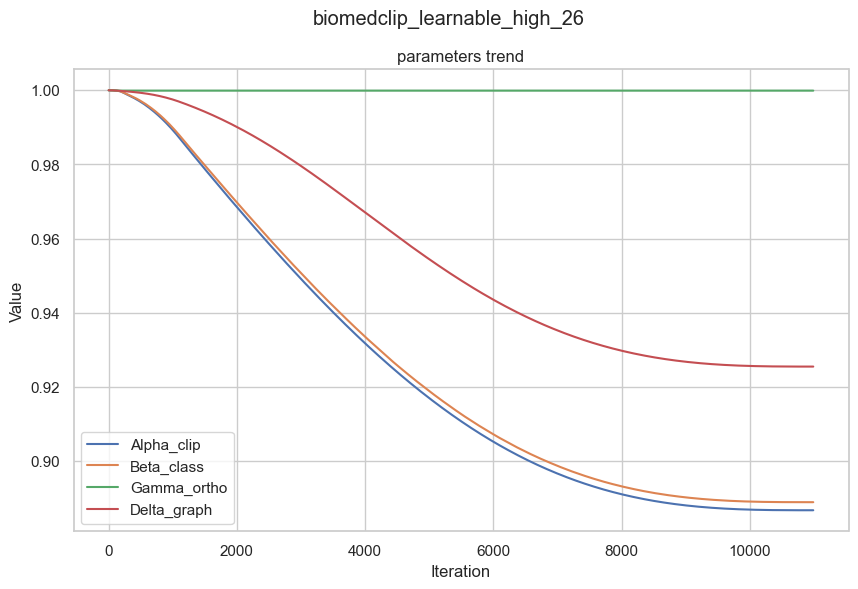

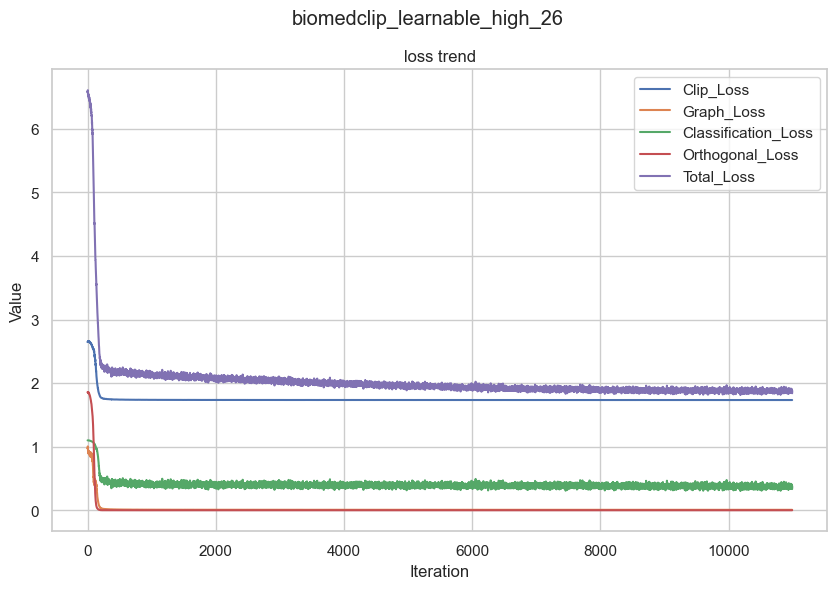

In [38]:
# 绘制参数变化趋势
log_path = "../log/biomedclip_learnable_high_26.log"

plot_line(log_path)

---
#### baseline models
1. densenet + clip + v
2. densenet + biomed + v
3. clip + v
4. biomed + v

##### performance

densenet_clip_v
print the len of df 4575


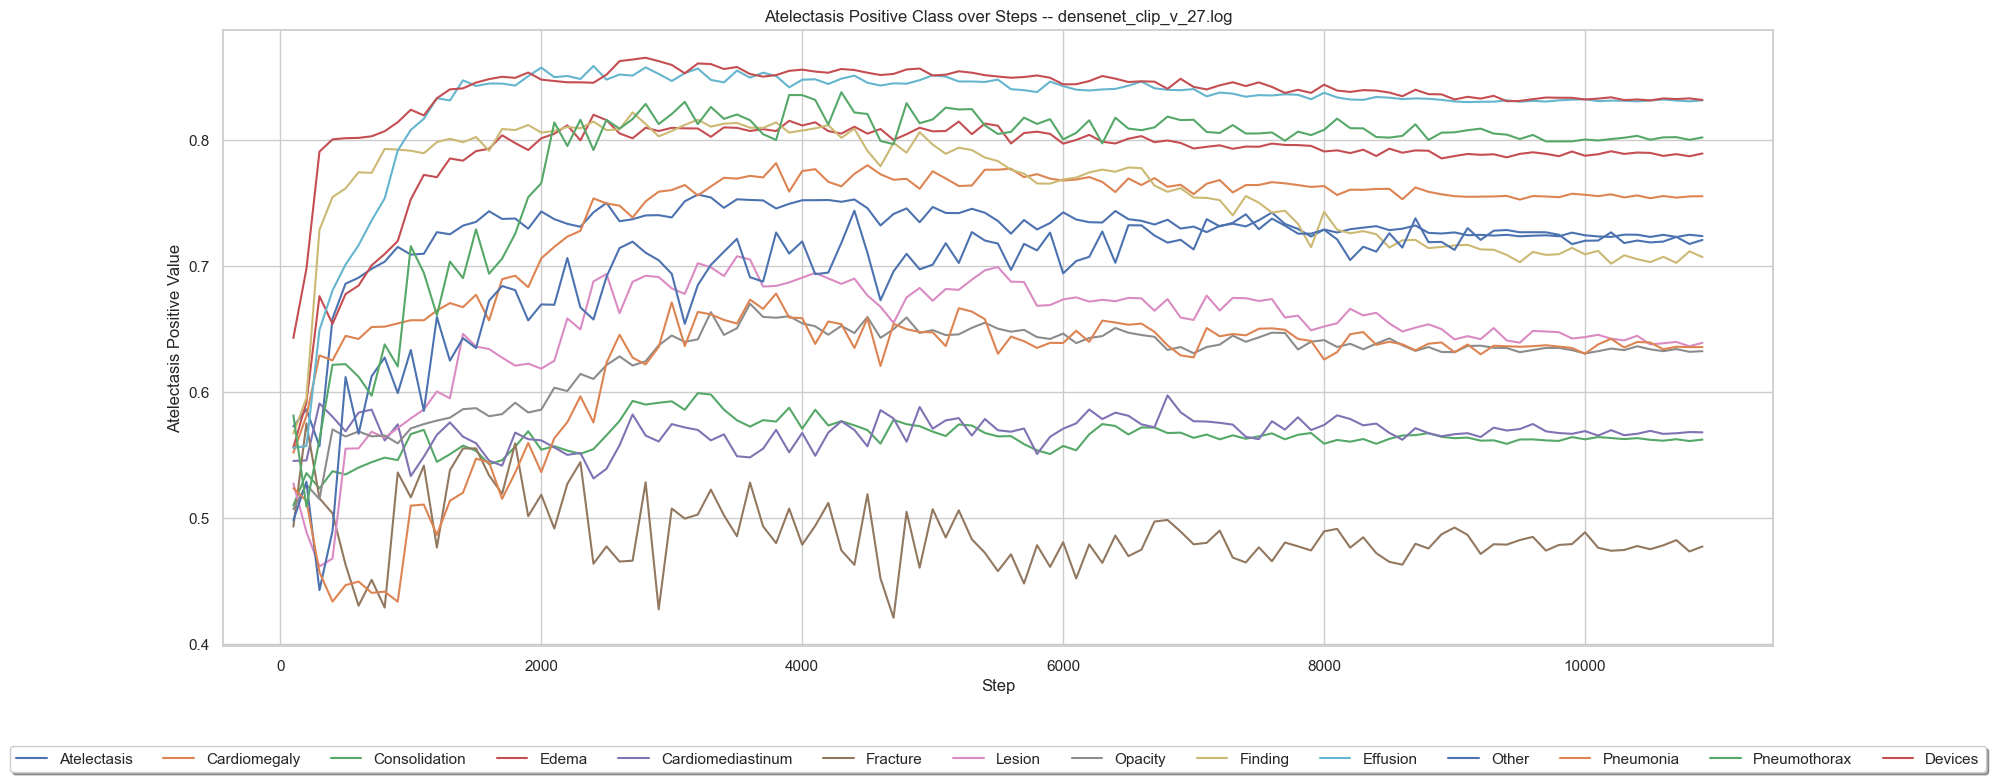

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7542149297247619, 'Cardiomegaly': 0.7629363276050973, 'Consolidation': 0.5979911990652115, 'Edema': 0.8022722868217054, 'Cardiomediastinum': 0.5616741405082212, 'Fracture': 0.5226405807801155, 'Lesion': 0.698800615613225, 'Opacity': 0.6633268419344368, 'Finding': 0.8103521394519025, 'Effusion': 0.8474066861408632, 'Other': 0.70075421472937, 'Pneumonia': 0.6615206889308969, 'Pneumothorax': 0.8259867952310835, 'Devices': 0.8599342068927429, 'average_auc_in_iter': 0.7192722609592594, 'iteration': 3300}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7565165031928884, 'Cardiomegaly': 0.7813784533027435, 'Consolidation': 0.5990851005643537, 'Edema': 0.8197819767441861, 'Cardiomediastinum': 0.5973094170403588, 'Fracture': 0.5751199704688077, 'Lesion': 0.7075837180915991, 'Opacity': 0.6699870172022071, 'Finding': 0.8216489719516833, 'Effusion': 0.8583966244725739, 'Other': 0.7437148772552499, 'Pneumonia': 

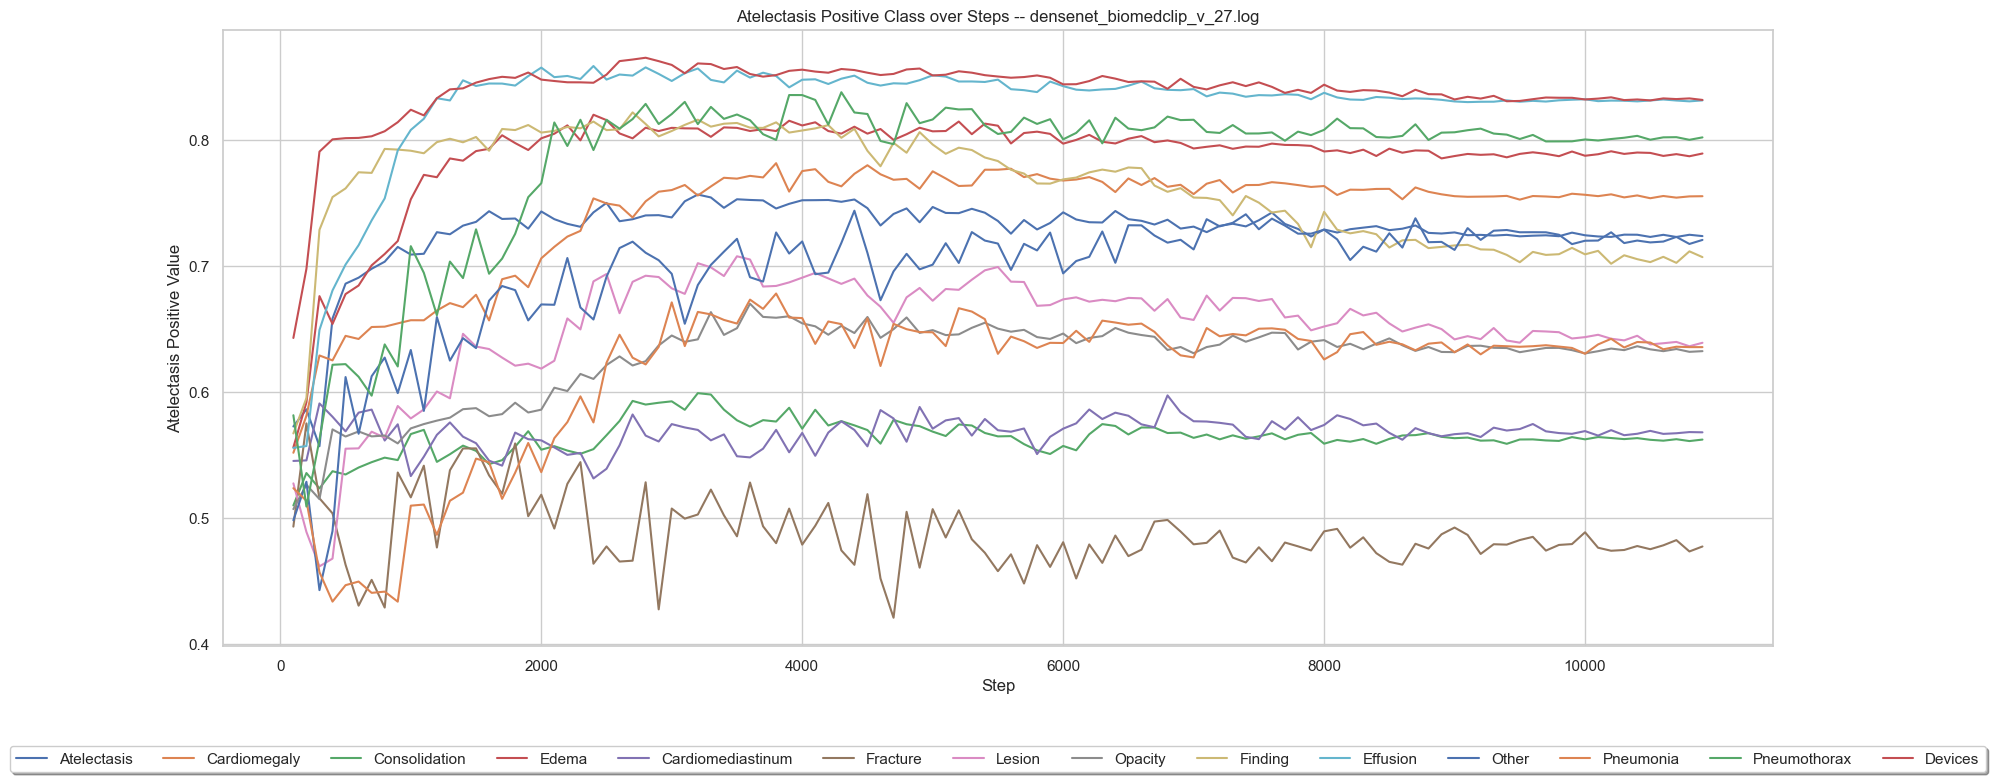

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7542149297247619, 'Cardiomegaly': 0.7629363276050973, 'Consolidation': 0.5979911990652115, 'Edema': 0.8022722868217054, 'Cardiomediastinum': 0.5616741405082212, 'Fracture': 0.5226405807801155, 'Lesion': 0.698800615613225, 'Opacity': 0.6633268419344368, 'Finding': 0.8103521394519025, 'Effusion': 0.8474066861408632, 'Other': 0.70075421472937, 'Pneumonia': 0.6615206889308969, 'Pneumothorax': 0.8259867952310835, 'Devices': 0.8599342068927429, 'average_auc_in_iter': 0.7192722609592594, 'iteration': 3300}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7565165031928884, 'Cardiomegaly': 0.7813784533027435, 'Consolidation': 0.5990851005643537, 'Edema': 0.8197819767441861, 'Cardiomediastinum': 0.5973094170403588, 'Fracture': 0.5751199704688077, 'Lesion': 0.7075837180915991, 'Opacity': 0.6699870172022071, 'Finding': 0.8216489719516833, 'Effusion': 0.8583966244725739, 'Other': 0.7437148772552499, 'Pneumonia': 

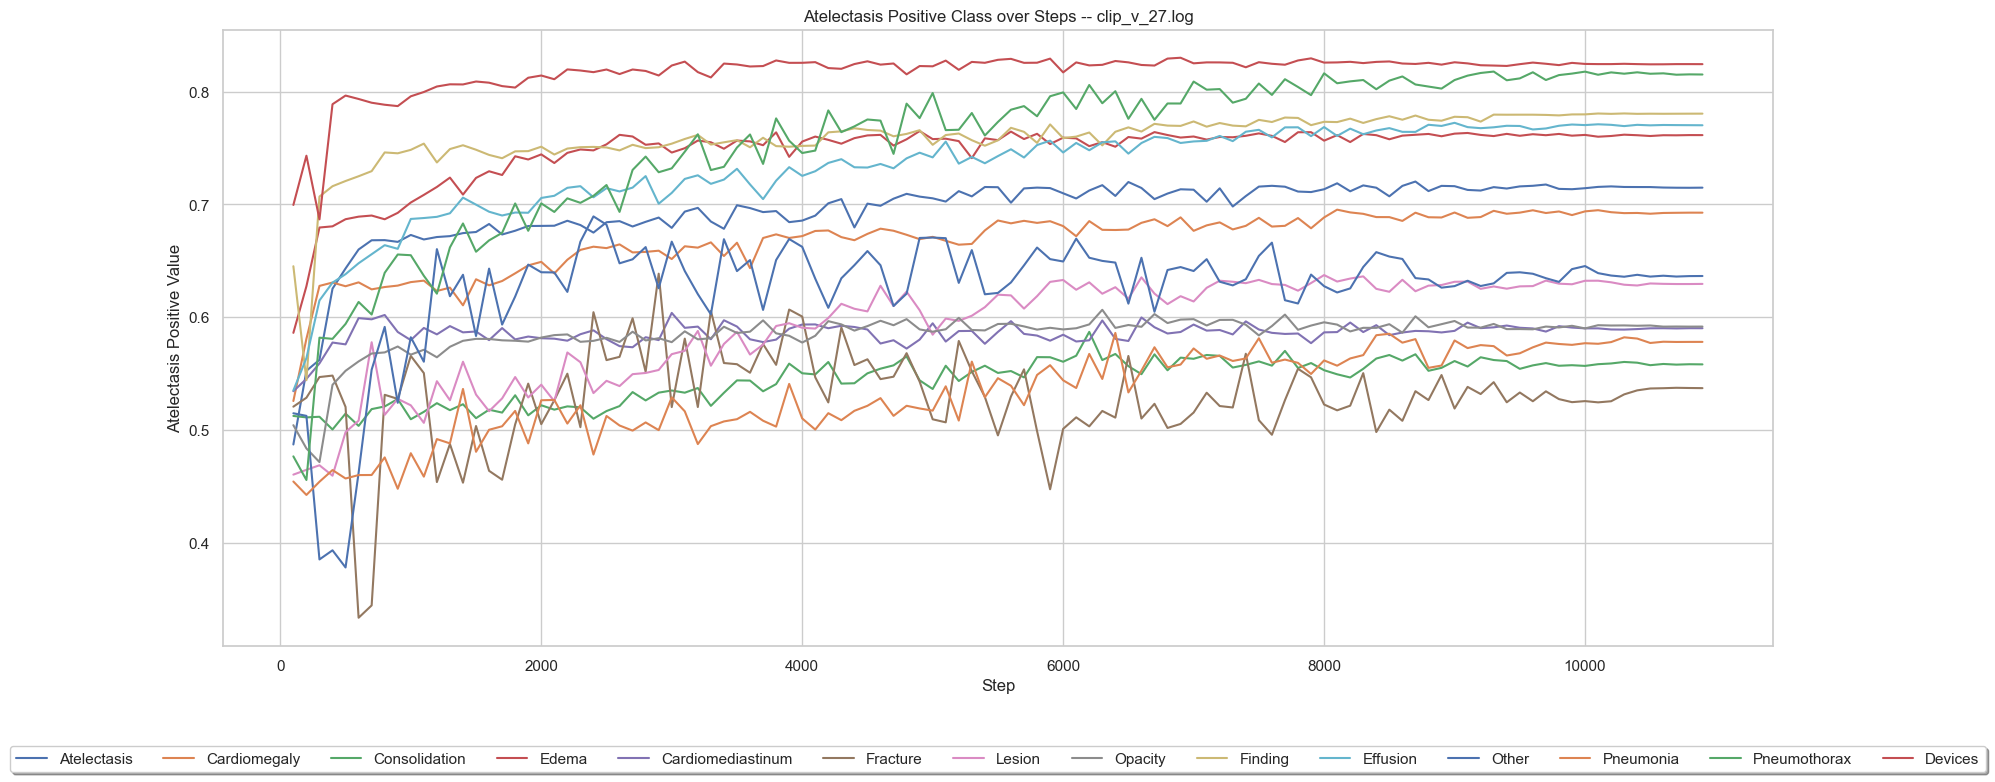

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7154605523776323, 'Cardiomegaly': 0.692476818659784, 'Consolidation': 0.5596673544986699, 'Edema': 0.7614195736434108, 'Cardiomediastinum': 0.58949177877429, 'Fracture': 0.5351298141995817, 'Lesion': 0.6281377699941623, 'Opacity': 0.592444011684518, 'Finding': 0.7803881138311253, 'Effusion': 0.7706329113924051, 'Other': 0.637625702454895, 'Pneumonia': 0.5810754043268221, 'Pneumothorax': 0.8172231985940246, 'Devices': 0.8244953330387719, 'average_auc_in_iter': 0.6775477383907209, 'iteration': 10400}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7203409973220934, 'Cardiomegaly': 0.6954034398829351, 'Consolidation': 0.5870148919772269, 'Edema': 0.7650968992248062, 'Cardiomediastinum': 0.6038266068759341, 'Fracture': 0.6386120339608712, 'Lesion': 0.637371968370217, 'Opacity': 0.6065790327815643, 'Finding': 0.7807317715188208, 'Effusion': 0.7724212917883804, 'Other': 0.6894225081336882, 'Pneumonia': 0.

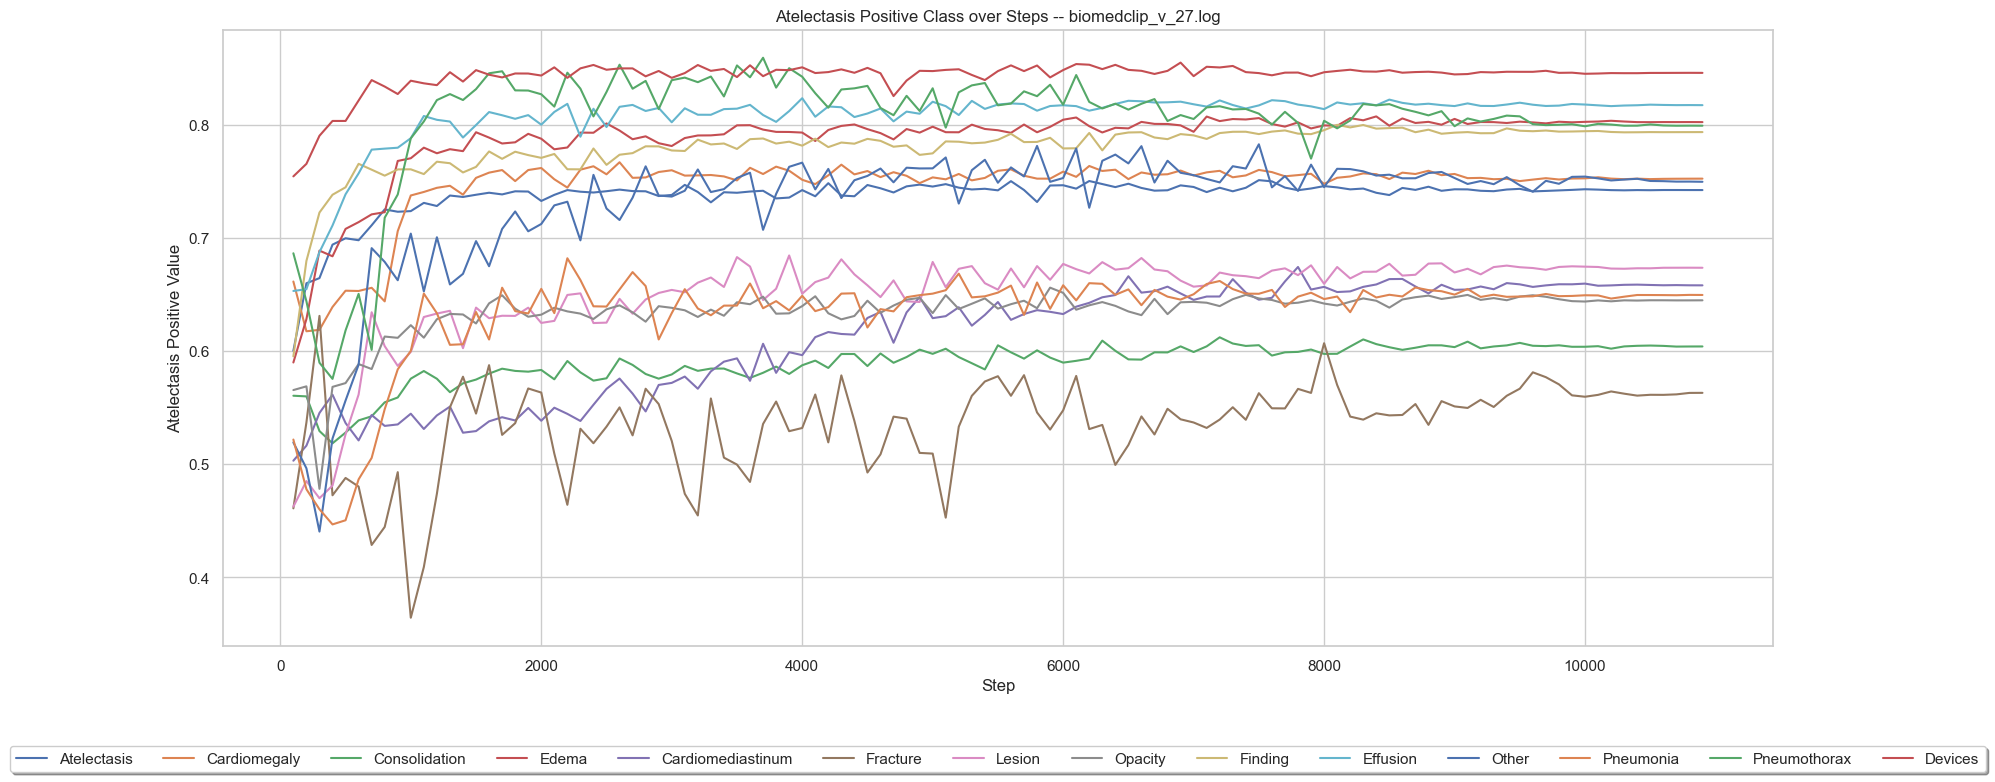

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7512478410369361, 'Cardiomegaly': 0.7602854558690522, 'Consolidation': 0.6053128806901524, 'Edema': 0.8060998062015504, 'Cardiomediastinum': 0.6455605381165919, 'Fracture': 0.5628768303186906, 'Lesion': 0.6645703974950911, 'Opacity': 0.6466699123661148, 'Finding': 0.7919701090930362, 'Effusion': 0.8173352807530022, 'Other': 0.782941437444543, 'Pneumonia': 0.6507763398122566, 'Pneumothorax': 0.8100508241105782, 'Devices': 0.8458936264221805, 'average_auc_in_iter': 0.7243993771235554, 'iteration': 7500}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7512478410369361, 'Cardiomegaly': 0.7670688932518586, 'Consolidation': 0.6122865027471844, 'Edema': 0.8076065891472868, 'Cardiomediastinum': 0.6744544095665171, 'Fracture': 0.6312292358803986, 'Lesion': 0.6846574324682907, 'Opacity': 0.6561927945472249, 'Finding': 0.800144774940774, 'Effusion': 0.8236871145731905, 'Other': 0.782941437444543, 'Pneumonia': 

In [39]:
baselines = {"densenet_clip_v":"../log/densenet_clip_v_27.log",
             "densenet_bio_v": "../log/densenet_biomedclip_v_27.log",
             "clip_v": "../log/clip_v_27.log",
             "biomed_v": "../log/biomedclip_v_27.log"
  }

for i, j in baselines.items():
  print(i)
  plot_and_print(j)

##### loss

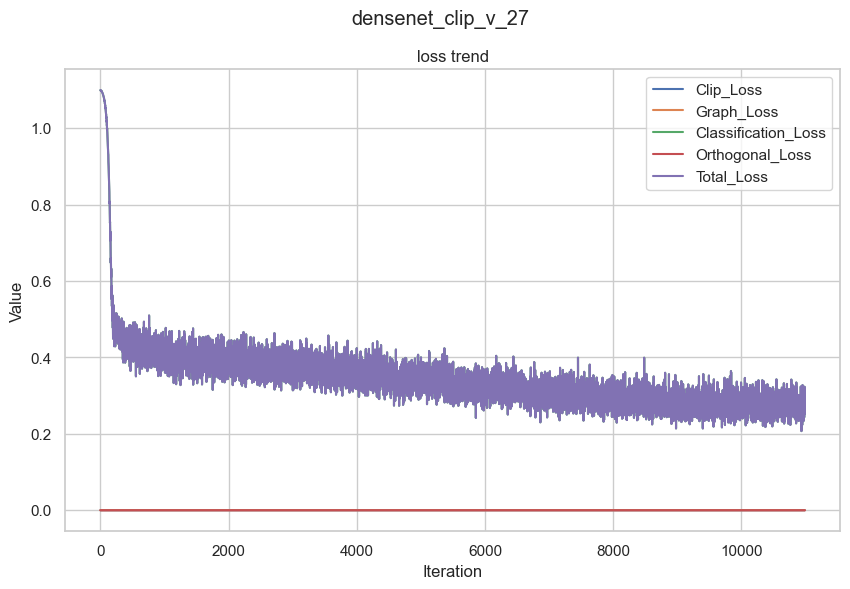

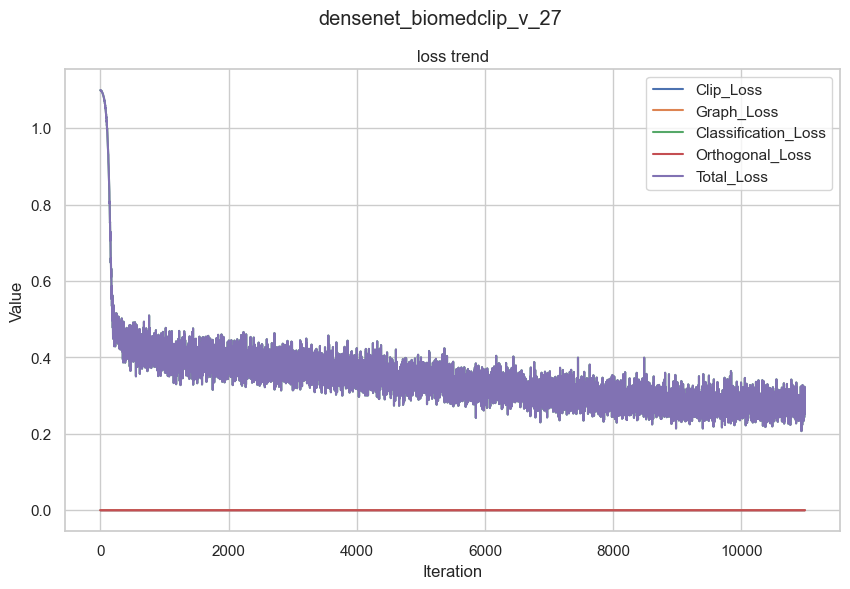

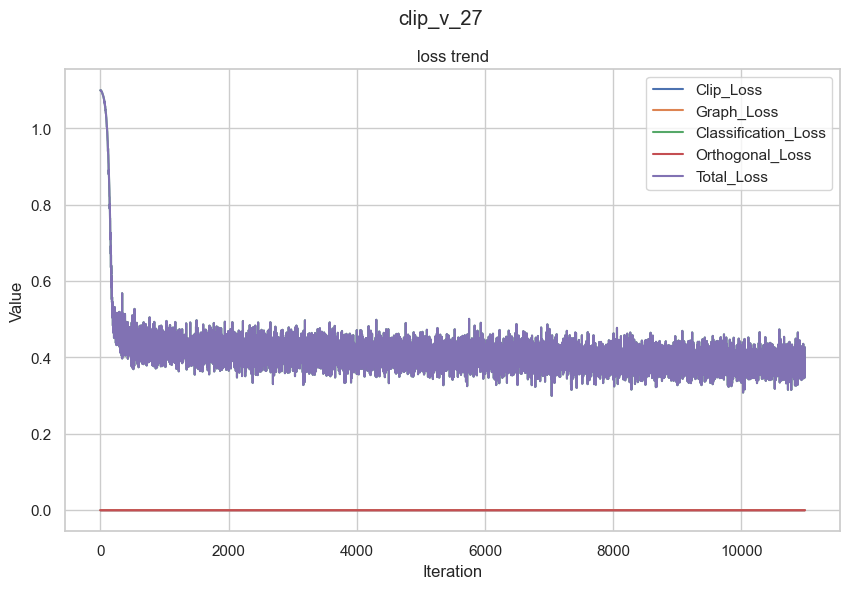

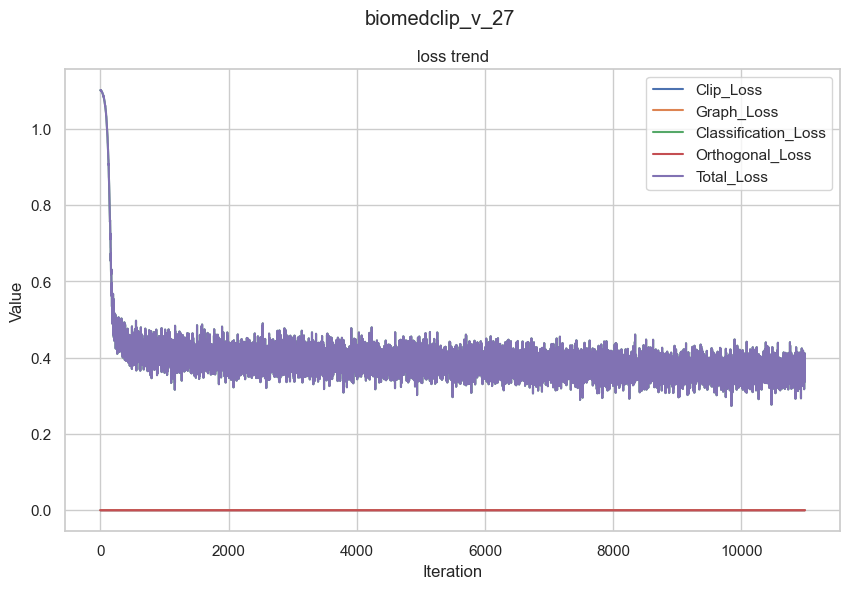

In [40]:
import seaborn as sns
for i, j in baselines.items():
  plot_line(j, True)

#### tuning hyperparameter in BiomedCLIP
##### performance

In [ ]:
biomed_hyper = {"biomed_high_order":"/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/biomedclip_high_28.log",
             "biomed_noContrastive_high": "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/log/biomed_noContrastive_highOrder_28.log",
             }


for i, j in biomed_hyper.items():
  print(i)
  plot_and_print(j)

In [ ]:
import seaborn as sns
for i, j in biomed_hyper.items():
  plot_line(j, True)

现阶段的结果是：     
1. 引入prior后 -- orthogonize 和 graph align 后，总体的平均性能只有细微提升（0.1%）    
2. 值得注意的是，引入后能否明显提升最差label的分类性能（`fracture`, 在当前数据集中是最难分类的label--在其他论文中，`fracture`也是分类结果最差的）

#### uncertainty based weighting strategy

uncertain_graph
print the len of df 2772


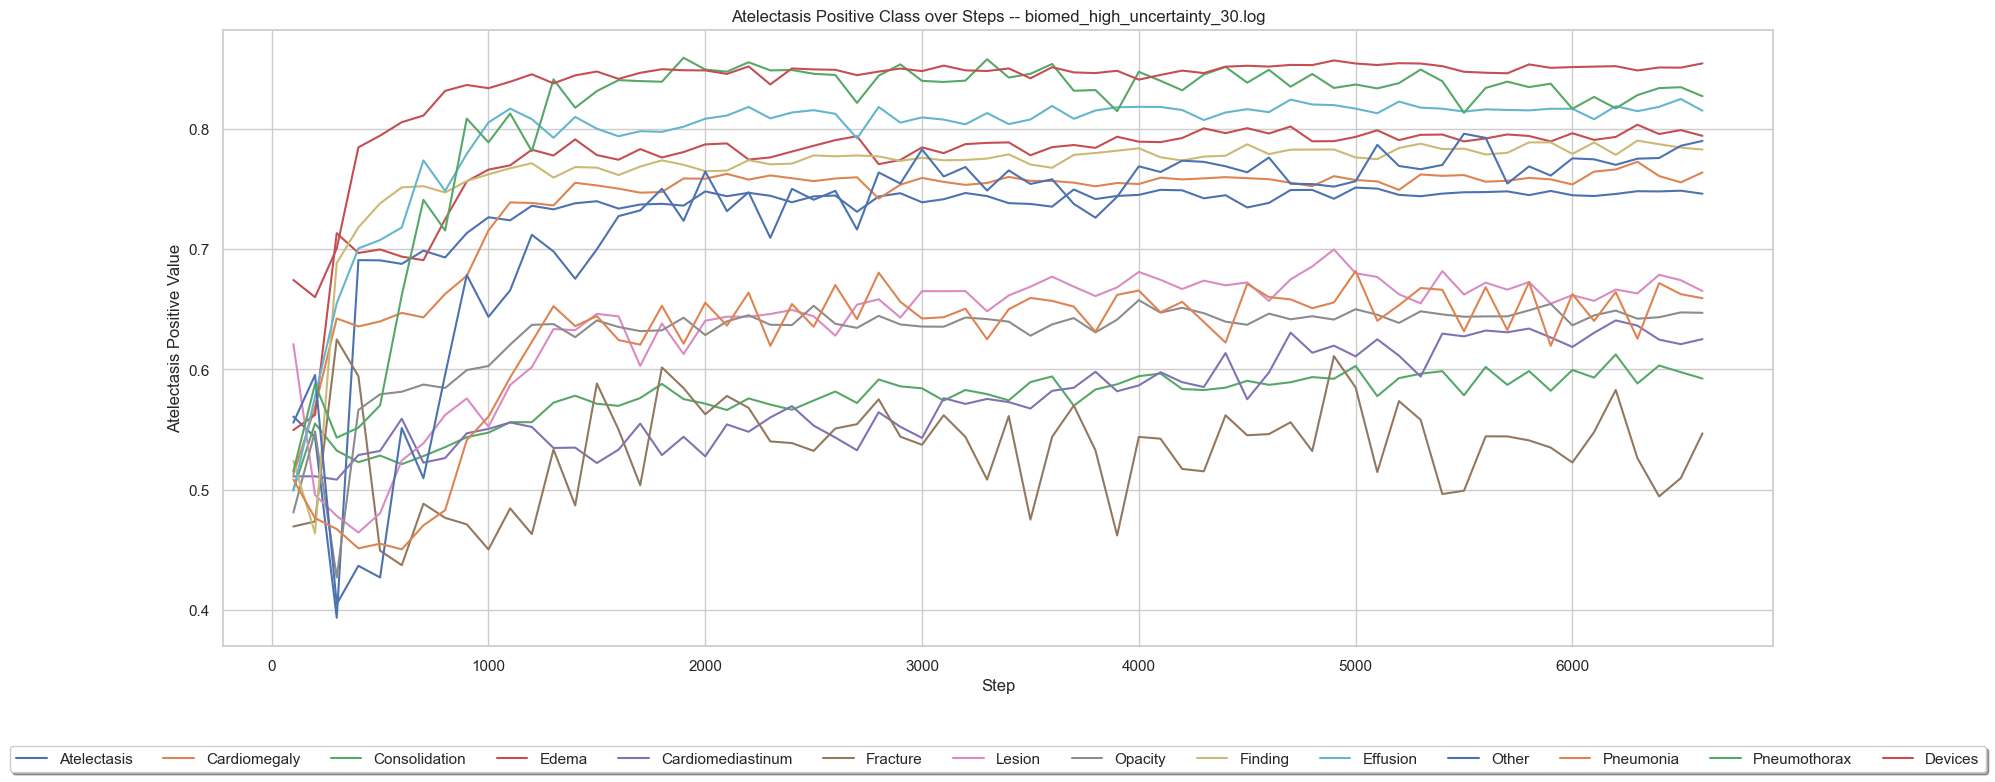

best_label_auc, best_auc_in_each_label
defaultdict(<class 'float'>, {'Atelectasis': 0.7418672455592704, 'Cardiomegaly': 0.7606494451920319, 'Consolidation': 0.5921612013027373, 'Edema': 0.7897625968992248, 'Cardiomediastinum': 0.6196711509715995, 'Fracture': 0.6109880644764365, 'Lesion': 0.6997293424613916, 'Opacity': 0.6413924050632912, 'Finding': 0.7828302769734725, 'Effusion': 0.8197500811424862, 'Other': 0.7519594794439515, 'Pneumonia': 0.6556153361446367, 'Pneumothorax': 0.8340141547522919, 'Devices': 0.8569120733458522, 'average_auc_in_iter': 0.7255216324091911, 'iteration': 4900}) 
 defaultdict(<class 'float'>, {'Atelectasis': 0.7511725744347082, 'Cardiomegaly': 0.7726243262520864, 'Consolidation': 0.6123610869403077, 'Edema': 0.8034593023255814, 'Cardiomediastinum': 0.6406875934230195, 'Fracture': 0.6248923341946597, 'Lesion': 0.6997293424613916, 'Opacity': 0.6575527426160338, 'Finding': 0.7902152613260799, 'Effusion': 0.8248653034728985, 'Other': 0.7959368530020704, 'Pneumonia

In [48]:
uncertain = {"uncertain_graph":"../log/biomed_high_uncertainty_30.log",
             }

for i, j in uncertain.items():
  print(i)
  plot_and_print(j)

##### Loss

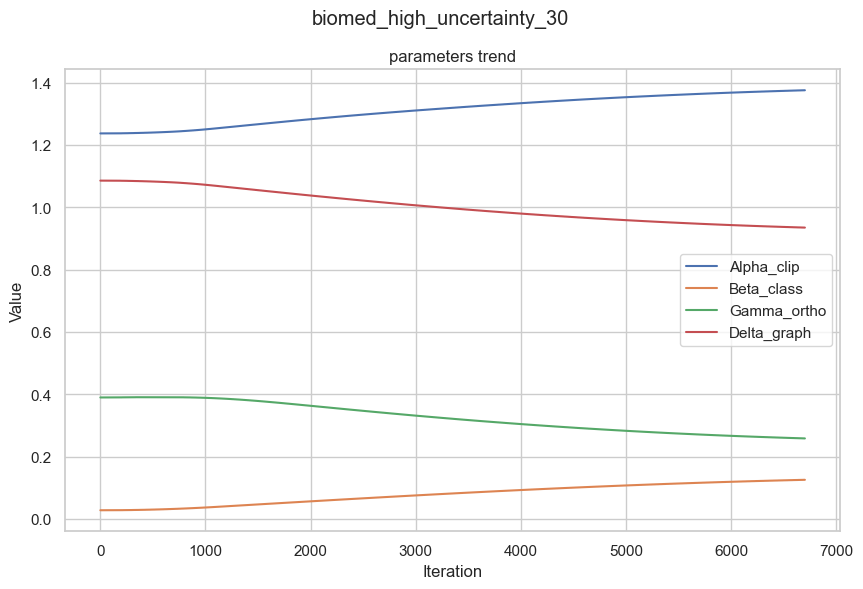

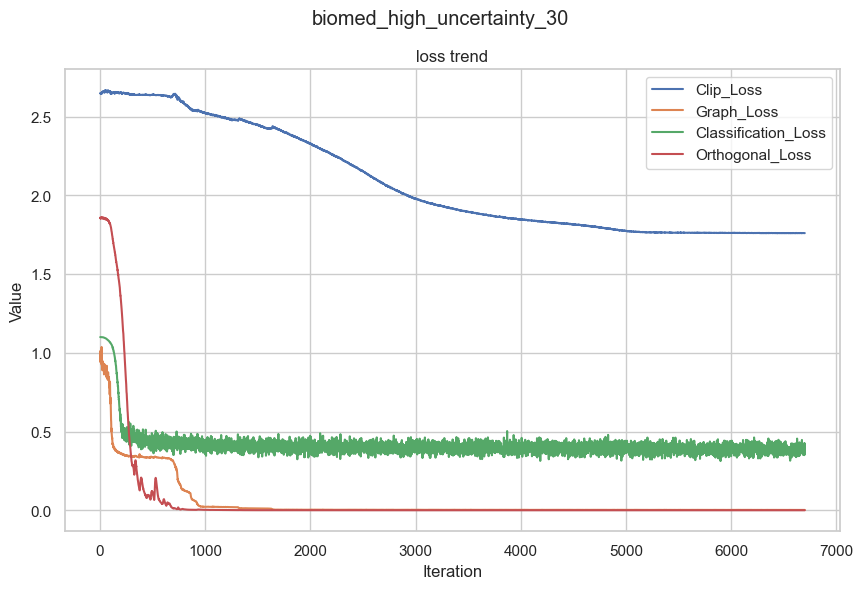

In [58]:
import seaborn as sns
for i, j in uncertain.items():
  plot_line(j, skip_total=True)